In [2]:
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as ticker
import seaborn as sns

In [2]:
#지수표현식 없애기 
pd.options.display.float_format = '{:.5f}'.format

#되돌리기
#pd.reset_option('display.float_format')

In [3]:
# 한글 깨짐 해결
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
# # 리샘플링
# import pandas as pd

# # 예시 데이터 로드 (실제 데이터 파일로 대체)
# # df = pd.read_csv('your_data.csv')

# # 대여월별로 그룹화하여 샘플링 비율 설정
# sampling_ratio = 0.1  # 10% 비율로 샘플링

# # 각 월별로 샘플링
# sampled_df = df.groupby('대여월').apply(lambda x: x.sample(frac=sampling_ratio)).reset_index(drop=True)

# # 결과 확인
# print(sampled_df)

### 0. 데이터 가져오기

In [4]:
df_in = pd.read_csv('./따릉이 대여이력 정보/서울특별시 공공자전거 대여이력 정보_23하반기(전처리완_내).csv')

In [5]:
display(df_in.head(1))
print(df_in.info(show_counts=True))

대여 대여소번호  대여 대여소명  반납대여소번호 반납대여소명  이용시간(분)   이용거리(M)    생년 성별 이용자종류  \
0      2191  대학동주민센터     2183   동방1교        1 318.46000  1955  M   내국인   

   대여대여소ID  반납대여소ID        대여날짜        반납날짜  대여시간  반납시간  대여일자    대여요일  연령대  \
0  ST-2375  ST-1678  2023-12-01  2023-12-01     0     0     1  Friday  60대   

   대여월  
0   12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12334954 entries, 0 to 12334953
Data columns (total 19 columns):
 #   Column    Non-Null Count     Dtype  
---  ------    --------------     -----  
 0   대여 대여소번호  12334954 non-null  int64  
 1   대여 대여소명   12334954 non-null  object 
 2   반납대여소번호   12334954 non-null  int64  
 3   반납대여소명    12334954 non-null  object 
 4   이용시간(분)   12334954 non-null  int64  
 5   이용거리(M)   12334954 non-null  float64
 6   생년        12334954 non-null  int64  
 7   성별        12334954 non-null  object 
 8   이용자종류     12334954 non-null  object 
 9   대여대여소ID   12334954 non-null  object 
 10  반납대여소ID   12334954 non-null  object 
 11  대여날짜      12334954 non-null  object 
 12  반납날짜      12334954 non-null  object 
 13  대여시간      12334954 non-null  int64  
 14  반납시간      12334954 non-null  int64  
 15  대여일자      12334954 non-null  int64  
 16  대여요일      12334954 non-null  object 
 17  연령대       12334954 non-null  object 
 18  대여월       12334954 non-null  int64  
dty

### 1. 모델링 적용 전 전처리

- df_in 필요없는 컬럼 1차 drop

In [7]:
df_in.head(1)

대여 대여소번호  대여 대여소명  반납대여소번호 반납대여소명  이용시간(분)   이용거리(M)    생년 성별 이용자종류  \
0      2191  대학동주민센터     2183   동방1교        1 318.46000  1955  M   내국인   

   대여대여소ID  반납대여소ID        대여날짜        반납날짜  대여시간  반납시간  대여일자    대여요일  연령대  \
0  ST-2375  ST-1678  2023-12-01  2023-12-01     0     0     1  Friday  60대   

   대여월  
0   12

In [8]:
df_in = df_in.drop(columns=['대여 대여소번호', '반납대여소번호', '대여 대여소명', '반납대여소명', '이용자종류'])

In [9]:
df_in.head(1)

이용시간(분)   이용거리(M)    생년 성별  대여대여소ID  반납대여소ID        대여날짜        반납날짜  대여시간  \
0        1 318.46000  1955  M  ST-2375  ST-1678  2023-12-01  2023-12-01     0   

   반납시간  대여일자    대여요일  연령대  대여월  
0     0     1  Friday  60대   12

#### (1) 데이터 층화추출 (샘플링)

In [ ]:
# import pandas as pd
# from sklearn.model_selection import StratifiedShuffleSplit

# # 층화 추출
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# # 연령대, 성별, 대여월을 기준으로 층화 추출
# for train_index, test_index in split.split(df_in, df_in[['연령대', '성별', '대여월']]):
#     stratified_sample = df_in.iloc[test_index]
    
# # 추출된 데이터 확인
# print(stratified_sample.head())

# # 결과를 파일로 저장 
# stratified_sample.to_csv('./서울시 따릉이 내국인 데이터(층화추출1).csv', index=False)

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# train_test_split 층화 추출
_, stratified_sample = train_test_split(df_in, test_size=0.5, stratify=df_in[['연령대', '성별', '대여월']], random_state=42)

# 추출된 데이터 확인
print(stratified_sample.head())

# 결과를 파일로 저장 
stratified_sample.to_csv('./서울시 따릉이 내국인 데이터(층화추출1).csv', index=False)

         이용시간(분)    이용거리(M)    생년 성별  대여대여소ID  반납대여소ID        대여날짜  \
763943         6 1045.13000  1980  M  ST-1376  ST-2190  2023-12-13   
506950         8 1599.36000  1995  M  ST-1337  ST-2379  2023-12-08   
3342117       55 3131.66000  1971  F  ST-2800   ST-300  2023-11-27   
5664292       17 3126.48000  1988  F   ST-493  ST-1086  2023-10-20   
716201         4  794.69000  1998  M   ST-914  ST-2835  2023-12-12   

               반납날짜  대여시간  반납시간  대여일자       대여요일  연령대  대여월  
763943   2023-12-13    14    14    13  Wednesday  40대   12  
506950   2023-12-08    20    20     8     Friday  20대   12  
3342117  2023-11-27    14    15    27     Monday  50대   11  
5664292  2023-10-20     8     8    20     Friday  30대   10  
716201   2023-12-12    20    20    12    Tuesday  20대   12  


- df_ins : 층화추출 샘플링된 데이터 

In [16]:
df_ins = pd.read_csv('./서울시 따릉이 내국인 데이터(층화추출1).csv')

In [7]:
df_ins.head(1)

이용시간(분)    이용거리(M)    생년 성별  대여대여소ID  반납대여소ID        대여날짜        반납날짜  \
0        6 1045.13000  1980  M  ST-1376  ST-2190  2023-12-13  2023-12-13   

   대여시간  반납시간  대여일자       대여요일  연령대  대여월  
0    14    14    13  Wednesday  40대   12

##### (2) 따릉이대여소 마스터 정보 + df_in 조인
- ll_join : '따릉이 마스터 정보' 전처리 완료한 데이터

In [49]:
ll_join = pd.read_csv('./서울시 따릉이대여소 마스터 정보(전처리).csv')

In [50]:
ll_join.head(1)

대여소_ID       위도        경도    구
0  ST-999  37.5334  126.8765  양천구

In [18]:
# 대여대여소ID 기준 merge
df_ins = pd.merge(df_ins, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')

In [19]:
# 반납대여소ID 기준 merge
df_ins = pd.merge(df_ins, ll_join, how='left', left_on='반납대여소ID', right_on='대여소_ID')

In [10]:
df_ins.head(1)

이용시간(분)    이용거리(M)    생년 성별  대여대여소ID  반납대여소ID        대여날짜        반납날짜  \
0        6 1045.13000  1980  M  ST-1376  ST-2190  2023-12-13  2023-12-13   

   대여시간  반납시간  ...  연령대 대여월 대여소_ID_x     위도_x      경도_x  구_x  대여소_ID_y  \
0    14    14  ...  40대  12  ST-1376 37.54446 126.97239  용산구   ST-2190   

      위도_y      경도_y  구_y  
0 37.55155 126.97686  용산구  

[1 rows x 22 columns]

- 필요없는 컬럼 drop

In [20]:
df_ins = df_ins.drop(columns=['대여소_ID_y'])

In [21]:
df_ins.head(1)

이용시간(분)    이용거리(M)    생년 성별  대여대여소ID  반납대여소ID        대여날짜        반납날짜  \
0        6 1045.13000  1980  M  ST-1376  ST-2190  2023-12-13  2023-12-13   

   대여시간  반납시간  ...       대여요일  연령대 대여월  대여소_ID_x     위도_x      경도_x  구_x  \
0    14    14  ...  Wednesday  40대  12   ST-1376 37.54446 126.97239  용산구   

      위도_y      경도_y  구_y  
0 37.55155 126.97686  용산구  

[1 rows x 21 columns]

In [22]:
df_ins.columns = ['이용시간(분)', '이용거리(M)', '생년', '성별', '대여대여소ID', '반납대여소ID', '대여날짜', '반납날짜', '대여시간', '반납시간', '대여일자', '대여요일', '연령대','대여월', '대여소ID', '대여위도', '대여경도', '대여구', '반납위도', '반납경도', '반납구']

In [23]:
df_ins.head(1)

이용시간(분)    이용거리(M)    생년 성별  대여대여소ID  반납대여소ID        대여날짜        반납날짜  \
0        6 1045.13000  1980  M  ST-1376  ST-2190  2023-12-13  2023-12-13   

   대여시간  반납시간  ...       대여요일  연령대 대여월    대여소ID     대여위도      대여경도  대여구  \
0    14    14  ...  Wednesday  40대  12  ST-1376 37.54446 126.97239  용산구   

      반납위도      반납경도  반납구  
0 37.55155 126.97686  용산구  

[1 rows x 21 columns]

In [24]:
# csv 파일로 저장
#df_ins.to_csv('서울시 따릉이 내국인 데이터(층화1, 마스터조인).csv', index=False)

In [3]:
# 파일 저장 확인
df_ins = pd.read_csv('./서울시 따릉이 내국인 데이터(층화1, 마스터조인).csv')

In [26]:
df_ins.head(1)

이용시간(분)    이용거리(M)    생년 성별  대여대여소ID  반납대여소ID        대여날짜        반납날짜  \
0        6 1045.13000  1980  M  ST-1376  ST-2190  2023-12-13  2023-12-13   

   대여시간  반납시간  ...       대여요일  연령대 대여월    대여소ID     대여위도      대여경도  대여구  \
0    14    14  ...  Wednesday  40대  12  ST-1376 37.54446 126.97239  용산구   

      반납위도      반납경도  반납구  
0 37.55155 126.97686  용산구  

[1 rows x 21 columns]

#### (3) 전처리
- (연령대) 10대, 20대 이런 데이터 >> 10, 20 이렇게 바꾸기

In [4]:
# '기타'를 0으로 치환
df_ins['연령대'] = df_ins['연령대'].replace('기타', '0')



In [19]:
df_ins.head(1)

이용시간(분)    이용거리(M)    생년 성별  대여대여소ID  반납대여소ID        대여날짜        반납날짜  \
0        6 1045.13000  1980  M  ST-1376  ST-2190  2023-12-13  2023-12-13   

   대여시간  반납시간  대여일자       대여요일  연령대  대여월     대여위도      대여경도  대여구     반납위도  \
0    14    14    13  Wednesday   40   12 37.54446 126.97239  용산구 37.55155   

       반납경도  반납구  
0 126.97686  용산구

- 성별 더미변수화

In [5]:
# 성별 더미변수화
df_ins = pd.get_dummies(df_ins, columns=['성별'], prefix='성별', drop_first=True)
# True/False를 0/1로 변환
df_ins['성별_M'] = df_ins['성별_M'].astype(int)

In [21]:
df_ins.head(1)

이용시간(분)    이용거리(M)    생년  대여대여소ID  반납대여소ID        대여날짜        반납날짜  대여시간  \
0        6 1045.13000  1980  ST-1376  ST-2190  2023-12-13  2023-12-13    14   

   반납시간  대여일자       대여요일  연령대  대여월     대여위도      대여경도  대여구     반납위도      반납경도  \
0    14    13  Wednesday   40   12 37.54446 126.97239  용산구 37.55155 126.97686   

   반납구  성별_M  
0  용산구     1

- 대여시간, 반납시간 0 >> 24로 바꾸기

In [6]:
df_ins.loc[df_ins['대여시간'] == 0, '대여시간'] = 24
df_ins.loc[df_ins['반납시간'] == 0, '반납시간'] = 24

In [7]:
df_ins.head(1)

이용시간(분)  이용거리(M)    생년  대여대여소ID  반납대여소ID        대여날짜        반납날짜  대여시간  \
0        6  1045.13  1980  ST-1376  ST-2190  2023-12-13  2023-12-13    14   

   반납시간  대여일자       대여요일  연령대  대여월      대여위도       대여경도  대여구      반납위도  \
0    14    13  Wednesday   40   12  37.54446  126.97239  용산구  37.55155   

        반납경도  반납구  성별_M  
0  126.97686  용산구     1

#### (4) 대여구, 반납구 간단 EDA

<Axes: xlabel='count', ylabel='대여구'>

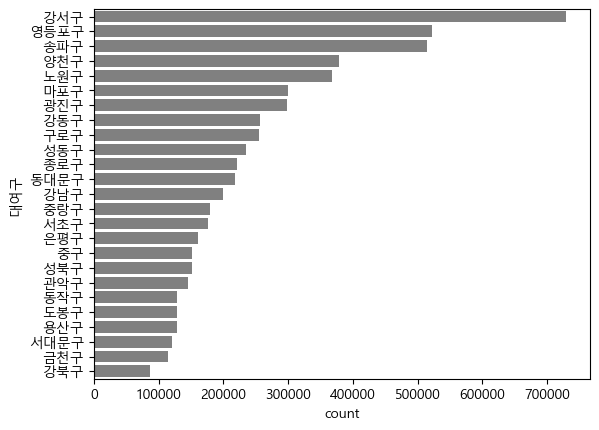

In [31]:
tmp = df_ins.groupby('대여구')['대여구'].value_counts().reset_index().sort_values(by='count', ascending=False)
sns.barplot(data=tmp, y='대여구', x='count', color='gray')

<Axes: xlabel='count', ylabel='반납구'>

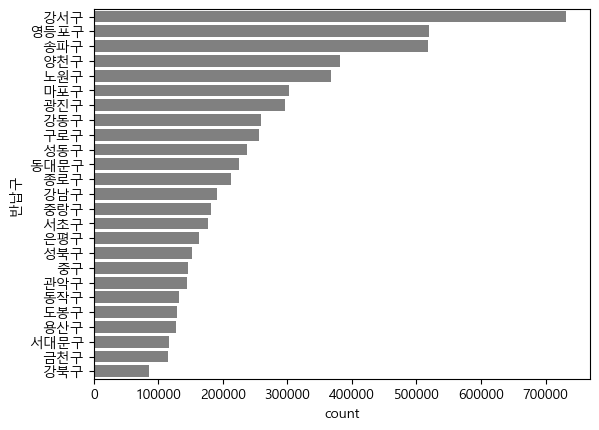

In [32]:
tmp2 = df_ins.groupby('반납구')['반납구'].value_counts().reset_index().sort_values(by='count', ascending=False)
sns.barplot(data=tmp2, y='반납구', x='count', color='gray')

#### (5) 대여구, 반납구 전처리

In [8]:
df1_ins = df_ins.copy()

In [9]:
# 대여구의 강남구와 반납구의 강남구가 동일한 숫자로 라벨링 되도록 학습
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 생성 및 학습
le = LabelEncoder()
combined_values = pd.concat([df1_ins['대여구'], df1_ins['반납구']])
le.fit(combined_values)

# 대여구와 반납구 컬럼 변환
df1_ins['대여구_e'] = le.transform(df1_ins['대여구'])
df1_ins['반납구_e'] = le.transform(df1_ins['반납구'])

In [10]:
# 결과 출력
df1_ins.head(1)

이용시간(분)  이용거리(M)    생년  대여대여소ID  반납대여소ID        대여날짜        반납날짜  대여시간  \
0        6  1045.13  1980  ST-1376  ST-2190  2023-12-13  2023-12-13    14   

   반납시간  대여일자  ... 대여월      대여위도       대여경도  대여구      반납위도       반납경도  반납구  \
0    14    13  ...  12  37.54446  126.97239  용산구  37.55155  126.97686  용산구   

   성별_M 대여구_e  반납구_e  
0     1    20     20  

[1 rows x 22 columns]

- null값 제거

In [11]:
# null값이 있어서 dropna 해줌
df1_ins = df1_ins.dropna(subset=['대여구', '반납구', '대여구_e', '반납구_e'])

- 각 구에 부여된 label 확인

In [44]:
# 각 구에 어떤 lebel이 붙었는지 확인
df1_ins[['대여구', '대여구_e']].drop_duplicates().sort_values(by='대여구_e')

대여구  대여구_encoded
6     강남구            0
3     강동구            1
65    강북구            2
16    강서구            3
1     관악구            4
7     광진구            5
14    구로구            6
36    금천구            7
4     노원구            8
118   도봉구            9
15   동대문구           10
17    동작구           11
21    마포구           12
9    서대문구           13
53    서초구           14
88    성동구           15
10    성북구           16
11    송파구           17
8     양천구           18
2    영등포구           19
0     용산구           20
39    은평구           21
12    종로구           22
78     중구           23
38    중랑구           24

- 대여구, 반납구 컬럼은 지우기

In [12]:
df1_ins = df1_ins.drop(columns=['대여구', '반납구'])

In [13]:
df1_ins.head(1)

이용시간(분)  이용거리(M)    생년  대여대여소ID  반납대여소ID        대여날짜        반납날짜  대여시간  \
0        6  1045.13  1980  ST-1376  ST-2190  2023-12-13  2023-12-13    14   

   반납시간  대여일자       대여요일  연령대  대여월      대여위도       대여경도      반납위도       반납경도  \
0    14    13  Wednesday   40   12  37.54446  126.97239  37.55155  126.97686   

   성별_M  대여구_e  반납구_e  
0     1     20     20

In [14]:
#df1_ins.to_csv('./(모델링_내2) 따릉이 대여이력(23.08~12).csv', index=False)

In [4]:
df1_ins = pd.read_csv('./(모델링_내2) 따릉이 대여이력(23.08~12).csv')

### 2. 특성 추출

일 평균 방문 고객 수   
남성 방문고객 비율   
남성 대비 여성 방문고객 비율  
주말-주중 일평균 방문고객 비율  
점심시간 이후 방문고객 비율  
새벽 방문고객 비율   
주중 청년고객 비율  
주말 청년고객 비율  
주중 장년고객 비율   
주말 장년고객 비율    
주중 출근시간대 방문고객 비율
주중 퇴근시간대 방문고객 비율  
주중 해당 대여구 고객 비율  
주말 해당 대여구 고객 비율
주중 해당 반납구 고객 비율  
주말 해당 반납구 고객 비율
대여소별 평균 연령대  
청년고객 비율  
장년고객 비율  
특정 시간대의 대여 횟수  
특정 요일의 대여 횟수  
평균 이동거리
평균 이동시간  
주중 평균 체류시간 대비 야간 체류시간 비  
주말 평균 체류시간 대비 야간 체류시간 비  

- 1트

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# df1_ins['대여일자'] = pd.to_datetime(df1_ins['대여일자'])

# # 주중/주말 구분
# df1_ins['주말여부'] = df1_ins['대여요일'].isin(['Saturday', 'Sunday'])

# # 시간대 구분
# df1_ins['점심시간'] = (df1_ins['대여시간'] >= 12) & (df1_ins['대여시간'] < 14)
# df1_ins['새벽시간'] = (df1_ins['대여시간'] >= 0) & (df1_ins['대여시간'] < 6)
# df1_ins['출근시간'] = (df1_ins['대여시간'] >= 7) & (df1_ins['대여시간'] < 9)
# df1_ins['퇴근시간'] = (df1_ins['대여시간'] >= 17) & (df1_ins['대여시간'] < 19)
# df1_ins['야간시간'] = (df1_ins['대여시간'] >= 19) & (df1_ins['대여시간'] < 24)

# # 대여대여소ID 기준 그룹화하여 통계 피처 생성
# grouped = df1_ins.groupby('대여대여소ID').agg({
#     '대여일자': 'count',  # 총 대여 횟수
#     '성별_M': 'mean',  # 남성 방문고객 비율
#     '이용시간(분)': ['mean', 'std'],  # 평균 이용시간 및 표준편차
#     '이용거리(M)': ['mean', 'std'],  # 평균 이용거리 및 표준편차
#     '주말여부': 'mean',  # 주말 대여 비율
#     '점심시간': 'mean',  # 점심시간 대여 비율
#     '새벽시간': 'mean',  # 새벽 대여 비율
#     '출근시간': 'mean',  # 출근 시간대 대여 비율
#     '퇴근시간': 'mean',  # 퇴근 시간대 대여 비율
#     '야간시간': 'mean'  # 야간 대여 비율
# }).reset_index()

# # 컬럼 이름 변경
# grouped.columns = [
#     '대여대여소ID', '총대여횟수', '남성고객비율', '평균이용시간', '이용시간표준편차',
#     '평균이용거리', '이용거리표준편차', '주말대여비율', '점심시간대여비율',
#     '새벽대여비율', '출근시간대여비율', '퇴근시간대여비율', '야간대여비율'
# ]

# # 주중/주말 연령대별 고객 비율 계산 함수
# def calculate_ratios(df):
#     weekday_data = df[~df['주말여부']]
#     weekend_data = df[df['주말여부']]
    
#     ratios = {
#         '주중청소년고객비율': (weekday_data['연령대'] == 10).mean(),
#         '주말청소년고객비율': (weekend_data['연령대'] == 10).mean(),
#         '주중청년고객비율': ((weekday_data['연령대'] == 20) | (weekday_data['연령대'] == 30)).mean(),
#         '주말청년고객비율': ((weekend_data['연령대'] == 20) | (weekend_data['연령대'] == 30)).mean(),
#         '주중장년고객비율': ((weekday_data['연령대'] == 40) | (weekday_data['연령대'] == 50)).mean(),
#         '주말장년고객비율': ((weekend_data['연령대'] == 40) | (weekend_data['연령대'] == 50)).mean(),
#         '주중노인고객비율': ((weekday_data['연령대'] == 60) | (weekday_data['연령대'] == 70)).mean(),
#         '주말노인고객비율': ((weekend_data['연령대'] == 60) | (weekend_data['연령대'] == 70)).mean()
#     }
#     return pd.Series(ratios)

# # 그룹화하여 추가 피처 계산
# additional_features = df1_ins.groupby('대여대여소ID').apply(calculate_ratios).reset_index()
# grouped = pd.merge(grouped, additional_features, on='대여대여소ID')

# print(grouped)

- 2트(오후시간대 포함)

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df1_ins['대여일자'] = pd.to_datetime(df1_ins['대여일자'])

# 주중/주말 구분
df1_ins['주말여부'] = df1_ins['대여요일'].isin(['Saturday', 'Sunday'])

# 시간대 구분
df1_ins['새벽시간'] = (df1_ins['대여시간'] >= 0) & (df1_ins['대여시간'] < 6)
df1_ins['출근시간'] = (df1_ins['대여시간'] >= 7) & (df1_ins['대여시간'] < 10)
df1_ins['오전시간'] = (df1_ins['대여시간'] >= 10) & (df1_ins['대여시간'] < 12)
df1_ins['점심시간'] = (df1_ins['대여시간'] >= 12) & (df1_ins['대여시간'] < 14)
df1_ins['오후시간'] = (df1_ins['대여시간'] >= 14) & (df1_ins['대여시간'] < 17)
df1_ins['퇴근시간'] = (df1_ins['대여시간'] >= 17) & (df1_ins['대여시간'] < 19)
df1_ins['야간시간'] = (df1_ins['대여시간'] >= 19) & (df1_ins['대여시간'] < 24)

# 대여대여소ID 기준 그룹화하여 통계 피처 생성
grouped = df1_ins.groupby('대여대여소ID').agg({
    '대여일자': 'count',  # 총 대여 횟수
    '성별_M': 'mean',  # 남성 방문고객 비율
    '이용시간(분)': 'mean',  # 평균 이용시간
    '이용거리(M)' : 'mean', # 평균 이용거리
    '주말여부': 'mean',  # 주말 대여 비율
    '새벽시간': 'mean',  # 새벽 대여 비율
    '출근시간': 'mean',  # 출근 시간대 대여 비율
    '오전시간': 'mean',  # 오전 대여 비율
    '점심시간': 'mean',  # 점심시간 대여 비율
    '오후시간': 'mean', # 오후시간 대여 비율
    '퇴근시간': 'mean',  # 퇴근 시간대 대여 비율
    '야간시간': 'mean',  # 야간 대여 비율
}).reset_index()

# 컬럼 이름 변경
grouped.columns = [
    '대여대여소ID', '총대여횟수', '남성고객비율', '평균이용시간', '평균이용거리',
    '주말대여비율', '새벽대여비율', '출근시간대여비율', '오전대여비율', '점심대여비율', '오후대여비율',
    '퇴근시간대여비율', '야간대여비율'
]

# 주중/주말 연령대별 고객 비율 계산 함수
def calculate_ratios(df):
    weekday_data = df[~df['주말여부']]
    weekend_data = df[df['주말여부']]
    
    ratios = {
        '주중청소년고객비율': (weekday_data['연령대'] == 10).mean(),
        '주말청소년고객비율': (weekend_data['연령대'] == 10).mean(),
        '주중청년고객비율': ((weekday_data['연령대'] == 20) | (weekday_data['연령대'] == 30)).mean(),
        '주말청년고객비율': ((weekend_data['연령대'] == 20) | (weekend_data['연령대'] == 30)).mean(),
        '주중장년고객비율': ((weekday_data['연령대'] == 40) | (weekday_data['연령대'] == 50)).mean(),
        '주말장년고객비율': ((weekend_data['연령대'] == 40) | (weekend_data['연령대'] == 50)).mean(),
        '주중노인고객비율': ((weekday_data['연령대'] == 60) | (weekday_data['연령대'] == 70)).mean(),
        '주말노인고객비율': ((weekend_data['연령대'] == 60) | (weekend_data['연령대'] == 70)).mean()
    }
    return pd.Series(ratios)

# 그룹화하여 추가 피처 계산
additional_features = df1_ins.groupby('대여대여소ID').apply(calculate_ratios).reset_index()
grouped = pd.merge(grouped, additional_features, on='대여대여소ID')

print(grouped)

      대여대여소ID  총대여횟수    남성고객비율     평균이용시간       평균이용거리    주말대여비율    점심대여비율  \
0       ST-10   2764  0.641823  30.027135  2896.118784  0.308249  0.099855   
1     ST-1000   3074  0.625895  19.268705  2427.495573  0.265777  0.093689   
2     ST-1002   5895  0.658863  20.319932  2289.621218  0.298049  0.087532   
3     ST-1003   1914  0.641066  17.774817  2121.170564  0.269592  0.096134   
4     ST-1004   1543  0.736876  15.806870  1868.960045  0.288399  0.088788   
...       ...    ...       ...        ...          ...       ...       ...   
2748   ST-993   2288  0.677885  18.303759  1884.028086  0.255682  0.092220   
2749   ST-994   4450  0.640225  20.783820  2037.581463  0.224045  0.087865   
2750   ST-995    467  0.698073  18.715203  2259.101649  0.241970  0.100642   
2751   ST-996   1075  0.709767  20.463256  1966.129544  0.279070  0.083721   
2752   ST-997   6979  0.640923  18.015618  1877.363578  0.252472  0.082533   

        오후대여비율    새벽대여비율  출근시간대여비율  퇴근시간대여비율    야간대여비율  주중청소년고객

C:\Users\LG\AppData\Local\Temp\ipykernel_9436\3418061814.py:57: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  additional_features = df1_ins.groupby('대여대여소ID').apply(calculate_ratios).reset_index()


### 3. k-means 군집분석

In [43]:
grouped = grouped.dropna()

In [24]:
grouped.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2752 entries, 0 to 2752
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여대여소ID    2752 non-null   object 
 1   총대여횟수      2752 non-null   int64  
 2   남성고객비율     2752 non-null   float64
 3   평균이용시간     2752 non-null   float64
 4   평균이용거리     2752 non-null   float64
 5   주말대여비율     2752 non-null   float64
 6   점심시간대여비율   2752 non-null   float64
 7   오후시간대여비율   2752 non-null   float64
 8   새벽대여비율     2752 non-null   float64
 9   출근시간대여비율   2752 non-null   float64
 10  퇴근시간대여비율   2752 non-null   float64
 11  야간대여비율     2752 non-null   float64
 12  주중청소년고객비율  2752 non-null   float64
 13  주말청소년고객비율  2752 non-null   float64
 14  주중청년고객비율   2752 non-null   float64
 15  주말청년고객비율   2752 non-null   float64
 16  주중장년고객비율   2752 non-null   float64
 17  주말장년고객비율   2752 non-null   float64
 18  주중노인고객비율   2752 non-null   float64
 19  주말노인고객비율   2752 non-null   float64
dtypes: float64(18

#### (1) 최적의 k찾기
- Elbow method

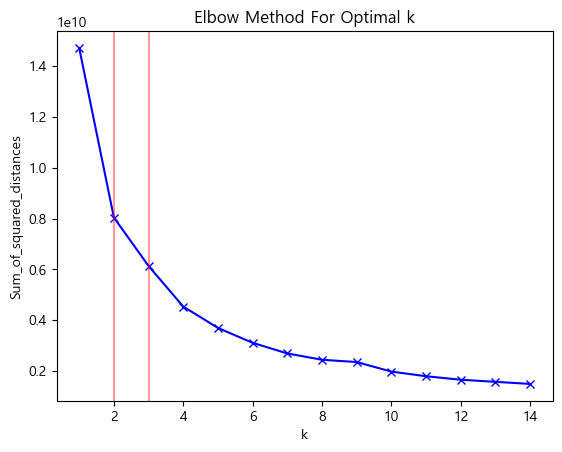

In [25]:
from sklearn.cluster import KMeans

# # 군집분석에 사용할 피처 선택
# features = grouped.drop(columns=['대여대여소ID'])

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(features)
    sum_of_squared_distances.append(km.inertia_)
    
# 시각화

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

- silhouette_score(실루엣점수)  
: 각 군집간의 거리가 얼마나 효율적으로 분리되어 있는지 (효율적으로 잘 분리 = 다른 군집과의 거리는 멀고, 동일 군집과의 데이터는 서로 가까운 것)  
: [-1, 1] 1에 가까울수록 좋음 (= 근처 군집과 멀리 떨어져 있다는 의미), 0에 가까울수록 근처 군집과 가까움

In [26]:
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(features)
  clusters = kmeans.predict(features)

  score = silhouette_score(features, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.5267140683914692
k : 3 score : 0.3756956801412976
k : 4 score : 0.39494375568362877
k : 5 score : 0.3868903067278828
k : 6 score : 0.34879216549652525
k : 7 score : 0.3462125430789088
k : 8 score : 0.34562471777055176
k : 9 score : 0.3191814485016946
k : 10 score : 0.3126998522523432
k : 11 score : 0.30574665895883596
k : 12 score : 0.29962811791445
k : 13 score : 0.2995635477197215
best n : 2 best score : 0.5267140683914692


#### (2) k-means 군집분석

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 군집분석에 사용할 피처 선택
features = grouped.drop(columns=['대여대여소ID'])

# 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-means 군집분석
kmeans = KMeans(n_clusters=4, random_state=42)
grouped['군집'] = kmeans.fit_predict(scaled_features)

# PCA 적용
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# PCA 결과를 데이터프레임에 추가
grouped['PCA1'] = pca_features[:, 0]
grouped['PCA2'] = pca_features[:, 1]

# 결과 출력
print(grouped)

      대여대여소ID  총대여횟수    남성고객비율     평균이용시간       평균이용거리    주말대여비율    점심대여비율  \
0       ST-10   2764  0.641823  30.027135  2896.118784  0.308249  0.099855   
1     ST-1000   3074  0.625895  19.268705  2427.495573  0.265777  0.093689   
2     ST-1002   5895  0.658863  20.319932  2289.621218  0.298049  0.087532   
3     ST-1003   1914  0.641066  17.774817  2121.170564  0.269592  0.096134   
4     ST-1004   1543  0.736876  15.806870  1868.960045  0.288399  0.088788   
...       ...    ...       ...        ...          ...       ...       ...   
2748   ST-993   2288  0.677885  18.303759  1884.028086  0.255682  0.092220   
2749   ST-994   4450  0.640225  20.783820  2037.581463  0.224045  0.087865   
2750   ST-995    467  0.698073  18.715203  2259.101649  0.241970  0.100642   
2751   ST-996   1075  0.709767  20.463256  1966.129544  0.279070  0.083721   
2752   ST-997   6979  0.640923  18.015618  1877.363578  0.252472  0.082533   

        오후대여비율    새벽대여비율  출근시간대여비율  ...  주말청소년고객비율  주중청년고객비율  주

In [ ]:
import matplotlib.pyplot as plt

# 군집 시각화
plt.figure(figsize=(10, 7))
plt.scatter(grouped['PCA1'], grouped['PCA2'], c=grouped['군집'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('대여소 군집 결과 (PCA)')
plt.colorbar(label='군집')
plt.show()

- k=2,3,4일 때의 군집 시각화

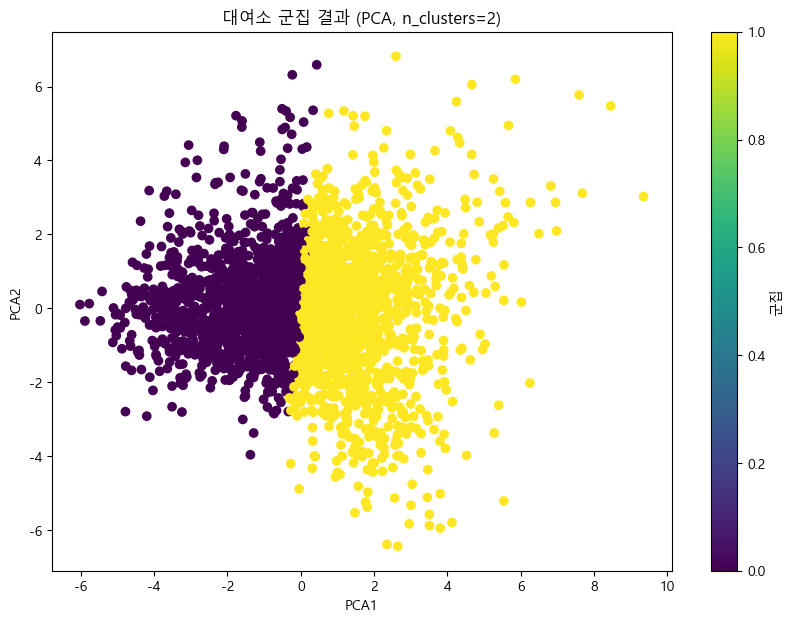

n_clusters = 2일 때 각 군집의 평균 값:


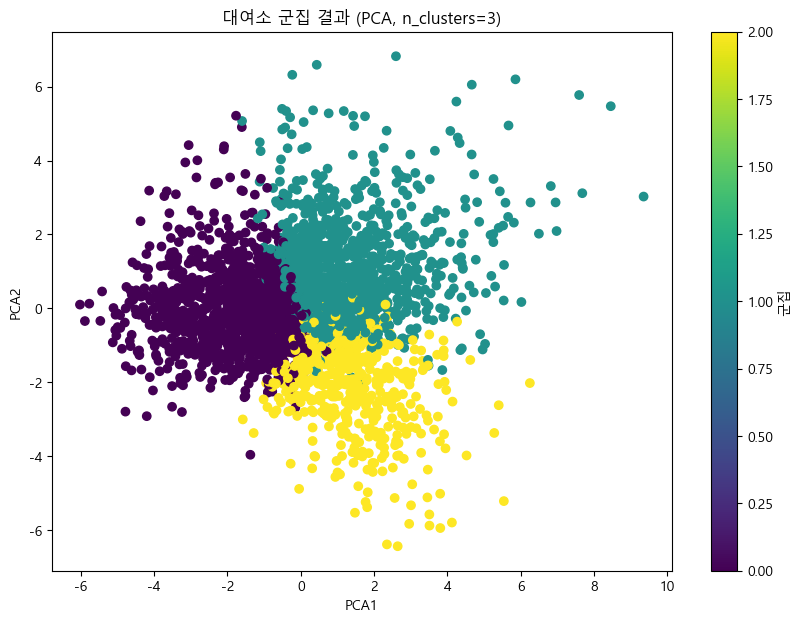

n_clusters = 3일 때 각 군집의 평균 값:


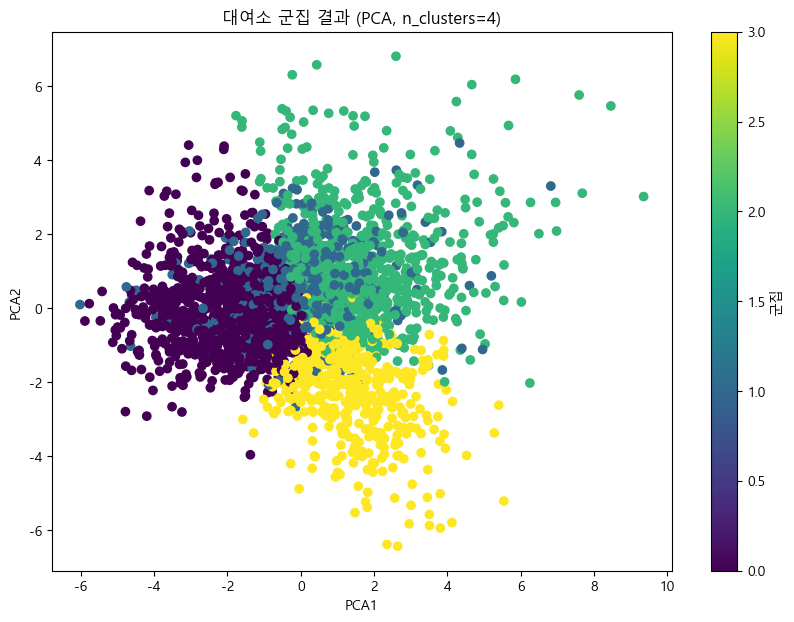

n_clusters = 4일 때 각 군집의 평균 값:


n_clusters = 2일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   0
1     ST-1000   1
2     ST-1002   1
3     ST-1003   1
4     ST-1004   1
...       ...  ..
2748   ST-993   1
2749   ST-994   0
2750   ST-995   1
2751   ST-996   1
2752   ST-997   1

[2752 rows x 2 columns]
n_clusters = 3일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   0
1     ST-1000   2
2     ST-1002   2
3     ST-1003   2
4     ST-1004   2
...       ...  ..
2748   ST-993   2
2749   ST-994   0
2750   ST-995   1
2751   ST-996   0
2752   ST-997   2

[2752 rows x 2 columns]
n_clusters = 4일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   0
1     ST-1000   3
2     ST-1002   3
3     ST-1003   3
4     ST-1004   3
...       ...  ..
2748   ST-993   3
2749   ST-994   1
2750   ST-995   3
2751   ST-996   0
2752   ST-997   3

[2752 rows x 2 columns]


In [45]:
# 변수 초기화
cluster_results = {}

# n_clusters 값을 2, 3, 4로 설정하여 K-means 군집분석 및 시각화
for n_clusters in [2, 3, 4]:
    # K-means 군집분석
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    grouped['군집'] = kmeans.fit_predict(scaled_features)

    # PCA 적용
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(scaled_features)

    # PCA 결과를 데이터프레임에 추가
    grouped['PCA1'] = pca_features[:, 0]
    grouped['PCA2'] = pca_features[:, 1]

    # 군집 시각화
    plt.figure(figsize=(10, 7))
    plt.scatter(grouped['PCA1'], grouped['PCA2'], c=grouped['군집'], cmap='viridis')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title(f'대여소 군집 결과 (PCA, n_clusters={n_clusters})')
    plt.colorbar(label='군집')
    plt.show()
    
    # 각 군집의 평균 값 계산 (대여대여소ID 제외)
    grouped_means = grouped.drop(columns=['대여대여소ID', 'PCA1', 'PCA2']).groupby('군집').mean()

    # # 컬럼 별로 가장 높은 값을 가진 군집의 셀에 파란색 배경 추가
    # def highlight_max(s):
    #     is_max = s == s.max()
    #     return ['background-color: #ccffcc' if v else '' for v in is_max]

    # styled_means = grouped_means.style.apply(highlight_max)
    
    # 컬럼 별로 가장 높은 값을 가진 군집의 셀에 연한 초록색 배경 추가
    def highlight_max(s):
        is_max = s == s.max()
        return ['background-color: #ccffcc' if v else '' for v in is_max]

    # 컬럼 별로 가장 낮은 값을 가진 군집의 셀에 연한 노랑색 배경 추가
    def highlight_min(s):
        is_min = s == s.min()
        return ['background-color: #fffff0' if v else '' for v in is_min]

    styled_means = grouped_means.style.apply(highlight_max).apply(highlight_min)

    
    # 결과 출력
    print(f"n_clusters = {n_clusters}일 때 각 군집의 평균 값:")
    display(styled_means)
    
    # 각 대여소가 속한 군집 저장
    cluster_results[f'cluster_{n_clusters}'] = grouped[['대여대여소ID', '군집']].copy()

# 결과 데이터프레임 확인
df_ins_2 = cluster_results['cluster_2']
df_ins_3 = cluster_results['cluster_3']
df_ins_4 = cluster_results['cluster_4']

print("n_clusters = 2일 때 각 대여소가 속한 군집:")
print(df_ins_2)

print("n_clusters = 3일 때 각 대여소가 속한 군집:")
print(df_ins_3)

print("n_clusters = 4일 때 각 대여소가 속한 군집:")
print(df_ins_4)

In [35]:
merged_df = df_ins_2.merge(df_ins_3, on='대여대여소ID', suffixes=('_2', '_3')).merge(df_ins_4, on='대여대여소ID')
merged_df.columns = ['대여소ID', 'k=2', 'k=3', 'k=4']
merged_df.head()

대여소ID  k=2  k=3  k=4
0    ST-10    0    0    0
1  ST-1000    1    2    3
2  ST-1002    1    2    3
3  ST-1003    1    2    3
4  ST-1004    1    2    3

In [36]:
#merged_df.to_csv('./(군집결과) 서울시 따릉이 대여소 별 군집.csv', index=False)

#### (3) k=2, 3 데이터 결과 >> ll_join (서울시 따릉이 마스터 정보)와 위도, 경도 조인하기

- k=2

In [51]:
in_k_2 = pd.merge(df_ins_2, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')

In [56]:
in_k_2 = in_k_2.drop(columns=['대여소_ID'])

In [57]:
in_k_2.head(1)

대여대여소ID  군집        위도         경도    구
0   ST-10   0  37.55275  126.91862  마포구

In [58]:
in_k_2.columns = ['대여소ID', '군집', '위도', '경도', '구']
in_k_2.head(1)

대여소ID  군집        위도         경도    구
0  ST-10   0  37.55275  126.91862  마포구

In [66]:
in_k_2.groupby('군집')['구'].value_counts().reset_index()

군집     구  count
0    0   송파구    115
1    0  영등포구     95
2    0   강서구     92
3    0   마포구     84
4    0   광진구     70
5    0   관악구     65
6    0   성동구     64
7    0   강남구     60
8    0   용산구     59
9    0   금천구     53
10   0  동대문구     52
11   0   동작구     51
12   0   강동구     50
13   0   종로구     50
14   0    중구     47
15   0   노원구     46
16   0   중랑구     45
17   0   구로구     41
18   0   서초구     40
19   0   성북구     37
20   0  서대문구     36
21   0   은평구     31
22   0   강북구     19
23   0   도봉구     18
24   0   양천구     17
25   1   강남구    113
26   1   서초구    102
27   1   강서구    100
28   1   송파구     99
29   1   노원구     97
30   1   양천구     92
31   1   구로구     74
32   1   강동구     70
33   1   은평구     69
34   1  영등포구     61
35   1   도봉구     59
36   1   종로구     53
37   1   중랑구     50
38   1   성북구     45
39   1  서대문구     44
40   1    중구     42
41   1   강북구     41
42   1   마포구     39
43   1   용산구     33
44   1  동대문구     32
45   1   성동구     29
46   1   금천구     23
47   1   동작구     23
48   1   광진구     16
49   1   관악구      9

In [65]:
in_k_2.groupby('구')['군집'].value_counts().reset_index()

구  군집  count
0    강남구   1    113
1    강남구   0     60
2    강동구   1     70
3    강동구   0     50
4    강북구   1     41
5    강북구   0     19
6    강서구   1    100
7    강서구   0     92
8    관악구   0     65
9    관악구   1      9
10   광진구   0     70
11   광진구   1     16
12   구로구   1     74
13   구로구   0     41
14   금천구   0     53
15   금천구   1     23
16   노원구   1     97
17   노원구   0     46
18   도봉구   1     59
19   도봉구   0     18
20  동대문구   0     52
21  동대문구   1     32
22   동작구   0     51
23   동작구   1     23
24   마포구   0     84
25   마포구   1     39
26  서대문구   1     44
27  서대문구   0     36
28   서초구   1    102
29   서초구   0     40
30   성동구   0     64
31   성동구   1     29
32   성북구   1     45
33   성북구   0     37
34   송파구   0    115
35   송파구   1     99
36   양천구   1     92
37   양천구   0     17
38  영등포구   0     95
39  영등포구   1     61
40   용산구   0     59
41   용산구   1     33
42   은평구   1     69
43   은평구   0     31
44   종로구   1     53
45   종로구   0     50
46    중구   0     47
47    중구   1     42
48   중랑구   1     50
49   중랑구   0     45

In [61]:
#in_k_2.to_csv('./(군집_내국인_k=2) 서울시 따릉이 대여소 별 군집결과_마스터 조인.csv', index=False)

- k=3

In [52]:
in_k_3 = pd.merge(df_ins_3, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')

In [59]:
in_k_3 = in_k_3.drop(columns=['대여소_ID'])

In [60]:
in_k_3.columns = ['대여소ID', '군집', '위도', '경도', '구']
in_k_3.head(1)

대여소ID  군집        위도         경도    구
0  ST-10   0  37.55275  126.91862  마포구

In [62]:
#in_k_3.to_csv('./(군집_내국인_k=3) 서울시 따릉이 대여소 별 군집결과_마스터 조인.csv', index=False)

In [73]:
pd.set_option('display.max_rows', None)
in_k_3.groupby('군집')['구'].value_counts().reset_index()

군집     구  count
0    0   송파구    109
1    0   강서구     90
2    0  영등포구     86
3    0   마포구     76
4    0   광진구     69
5    0   관악구     60
6    0   성동구     60
7    0   강동구     49
8    0   용산구     48
9    0   금천구     47
10   0  동대문구     47
11   0   동작구     47
12   0   노원구     43
13   0   구로구     40
14   0   종로구     40
15   0   성북구     37
16   0   중랑구     35
17   0   강남구     34
18   0  서대문구     34
19   0   은평구     34
20   0    중구     32
21   0   서초구     29
22   0   강북구     17
23   0   도봉구     15
24   0   양천구     11
25   1   강남구    134
26   1   서초구    111
27   1   송파구     89
28   1   종로구     61
29   1    중구     57
30   1  영등포구     49
31   1   노원구     48
32   1   은평구     48
33   1   도봉구     44
34   1  서대문구     44
35   1   용산구     43
36   1   강북구     39
37   1   마포구     39
38   1   강서구     35
39   1   강동구     34
40   1   성북구     34
41   1   성동구     28
42   1   금천구     27
43   1   구로구     25
44   1  동대문구     21
45   1   동작구     21
46   1   중랑구     13
47   1   관악구      9
48   1   광진구      8
49   1   양천구      5
50   2   양천구     93
51   2   강서구     67
52   2   노원구     52
53   2   구로구     50
54   2   중랑구     47
55   2   강동구     37
56   2  영등포구     21
57   2   도봉구     18
58   2   은평구     18
59   2  동대문구     16
60   2   송파구     16
61   2   성북구     11
62   2   광진구      9
63   2   마포구      8
64   2   동작구      6
65   2   강남구      5
66   2   관악구      5
67   2   성동구      5
68   2   강북구      4
69   2   금천구      2
70   2  서대문구      2
71   2   서초구      2
72   2   종로구      2
73   2   용산구      1

In [67]:
in_k_3.groupby('구')['군집'].value_counts().reset_index()

구  군집  count
0   강남구   1    134
1   강남구   0     34
2   강남구   2      5
3   강동구   0     49
4   강동구   2     37
..  ...  ..    ...
69   중구   1     57
70   중구   0     32
71  중랑구   2     47
72  중랑구   0     35
73  중랑구   1     13

[74 rows x 3 columns]

### 4. DB Scan 군집분석

C:\Users\LG\AppData\Local\Temp\ipykernel_2632\1893907878.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  additional_features = df1_ins.groupby('대여대여소ID').apply(calculate_ratios).reset_index()


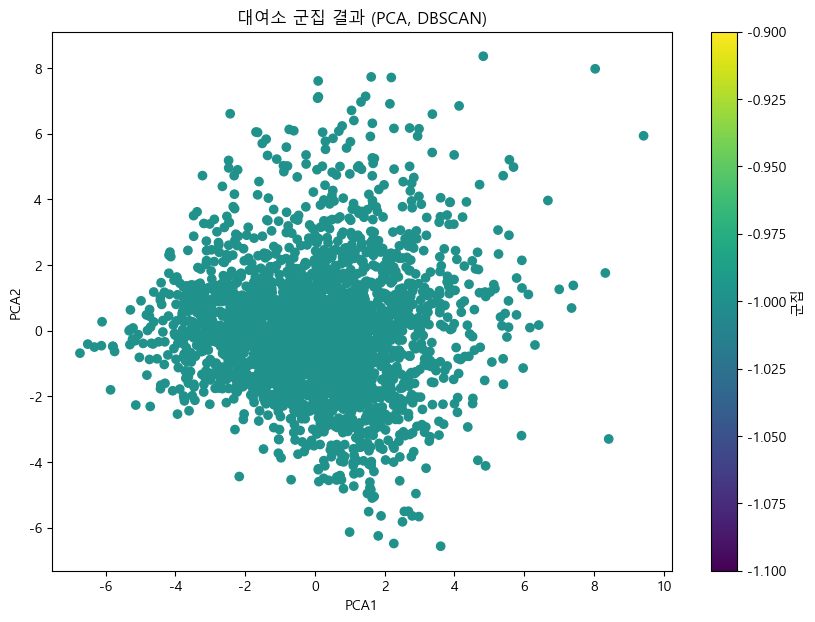

DBSCAN을 사용한 각 군집의 평균 값:


In [86]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 데이터 준비 및 전처리
df1_ins['대여일자'] = pd.to_datetime(df1_ins['대여일자'])

# 주중/주말 구분
df1_ins['주말여부'] = df1_ins['대여요일'].isin(['Saturday', 'Sunday'])

# 시간대 구분
df1_ins['점심시간'] = (df1_ins['대여시간'] >= 12) & (df1_ins['대여시간'] < 14)
df1_ins['새벽시간'] = (df1_ins['대여시간'] >= 0) & (df1_ins['대여시간'] < 6)
df1_ins['출근시간'] = (df1_ins['대여시간'] >= 7) & (df1_ins['대여시간'] < 9)
df1_ins['퇴근시간'] = (df1_ins['대여시간'] >= 17) & (df1_ins['대여시간'] < 19)
df1_ins['야간시간'] = (df1_ins['대여시간'] >= 19) & (df1_ins['대여시간'] < 24)

# 대여대여소ID 기준 그룹화하여 통계 피처 생성
grouped = df1_ins.groupby('대여대여소ID').agg({
    '대여일자': 'count',  # 총 대여 횟수
    '성별_M': 'mean',  # 남성 방문고객 비율
    '이용시간(분)': ['mean', 'std'],  # 평균 이용시간 및 표준편차
    '이용거리(M)': ['mean', 'std'],  # 평균 이용거리 및 표준편차
    '주말여부': 'mean',  # 주말 대여 비율
    '점심시간': 'mean',  # 점심시간 대여 비율
    '새벽시간': 'mean',  # 새벽 대여 비율
    '출근시간': 'mean',  # 출근 시간대 대여 비율
    '퇴근시간': 'mean',  # 퇴근 시간대 대여 비율
    '야간시간': 'mean'  # 야간 대여 비율
}).reset_index()

# 컬럼 이름 변경
grouped.columns = [
    '대여대여소ID', '총대여횟수', '남성고객비율', '평균이용시간', '이용시간표준편차',
    '평균이용거리', '이용거리표준편차', '주말대여비율', '점심시간대여비율',
    '새벽대여비율', '출근시간대여비율', '퇴근시간대여비율', '야간대여비율'
]

# 주중/주말 연령대별 고객 비율 계산 함수
def calculate_ratios(df):
    weekday_data = df[~df['주말여부']]
    weekend_data = df[df['주말여부']]
    
    ratios = {
        '주중청소년고객비율': (weekday_data['연령대'] == 10).mean(),
        '주말청소년고객비율': (weekend_data['연령대'] == 10).mean(),
        '주중청년고객비율': ((weekday_data['연령대'] == 20) | (weekday_data['연령대'] == 30)).mean(),
        '주말청년고객비율': ((weekend_data['연령대'] == 20) | (weekend_data['연령대'] == 30)).mean(),
        '주중장년고객비율': ((weekday_data['연령대'] == 40) | (weekday_data['연령대'] == 50)).mean(),
        '주말장년고객비율': ((weekend_data['연령대'] == 40) | (weekend_data['연령대'] == 50)).mean(),
        '주중노인고객비율': ((weekday_data['연령대'] == 60) | (weekday_data['연령대'] == 70)).mean(),
        '주말노인고객비율': ((weekend_data['연령대'] == 60) | (weekend_data['연령대'] == 70)).mean()
    }
    return pd.Series(ratios)

# 그룹화하여 추가 피처 계산
additional_features = df1_ins.groupby('대여대여소ID').apply(calculate_ratios).reset_index()
grouped = pd.merge(grouped, additional_features, on='대여대여소ID')

# null 값 제거
grouped = grouped.dropna()

# 군집분석에 사용할 피처 선택
features = grouped.drop(columns=['대여대여소ID'])

# 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# DBSCAN 군집분석 >> eps, min_samples 값 조정 필요!
dbscan = DBSCAN(eps=0.7, min_samples=3)
grouped['군집'] = dbscan.fit_predict(scaled_features)

# PCA 적용
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# PCA 결과를 데이터프레임에 추가
grouped['PCA1'] = pca_features[:, 0]
grouped['PCA2'] = pca_features[:, 1]

# 군집 시각화
plt.figure(figsize=(10, 7))
plt.scatter(grouped['PCA1'], grouped['PCA2'], c=grouped['군집'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('대여소 군집 결과 (PCA, DBSCAN)')
plt.colorbar(label='군집')
plt.show()

# 각 군집의 평균 값 계산 (대여대여소ID, PCA1, PCA2 제외)
grouped_means = grouped.drop(columns=['대여대여소ID', 'PCA1', 'PCA2']).groupby('군집').mean()

# 컬럼 별로 가장 높은 값을 가진 군집의 셀에 연한 초록색 배경 추가
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #ccffcc' if v else '' for v in is_max]

styled_means = grouped_means.style.apply(highlight_max)

# 결과 출력
print("DBSCAN을 사용한 각 군집의 평균 값:")
display(styled_means)

### 5. k-means 보완

- (1) 비율..이라고 해놓고 mean을 구해놓은 건에 대하여.. 새로고침
- (1-1) 청년1,2 분류하기 이전

In [136]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df1_ins['대여일자'] = pd.to_datetime(df1_ins['대여일자'])

# 주중/주말 구분
df1_ins['주말여부'] = df1_ins['대여요일'].isin(['Saturday', 'Sunday'])

# 시간대 구분
df1_ins['새벽시간'] = (df1_ins['대여시간'] >= 0) & (df1_ins['대여시간'] < 6)
df1_ins['출근시간'] = (df1_ins['대여시간'] >= 7) & (df1_ins['대여시간'] < 10)
df1_ins['오전시간'] = (df1_ins['대여시간'] >= 10) & (df1_ins['대여시간'] < 12)
df1_ins['점심시간'] = (df1_ins['대여시간'] >= 12) & (df1_ins['대여시간'] < 14)
df1_ins['오후시간'] = (df1_ins['대여시간'] >= 14) & (df1_ins['대여시간'] < 17)
df1_ins['퇴근시간'] = (df1_ins['대여시간'] >= 17) & (df1_ins['대여시간'] < 19)
df1_ins['야간시간'] = (df1_ins['대여시간'] >= 19) & (df1_ins['대여시간'] < 24)

# 대여대여소ID 기준 그룹화하여 통계 피처 생성
total_counts = df1_ins.groupby('대여대여소ID')['대여일자'].count()

grouped = df1_ins.groupby('대여대여소ID').agg({
    '대여일자': 'count',  # 총 대여 횟수
    '성별_M': 'mean',  # 남성 방문고객 비율
    '이용시간(분)': 'mean',  # 평균 이용시간
    '이용거리(M)': 'mean',  # 평균 이용거리
    '주말여부': lambda x: x.sum() / x.count(),  # 주말 대여 비율
    '새벽시간': lambda x: x.sum() / x.count(),  # 새벽 대여 비율
    '출근시간': lambda x: x.sum() / x.count(),  # 출근 시간대 대여 비율
    '오전시간': lambda x: x.sum() / x.count(),  # 오전 대여 비율
    '점심시간': lambda x: x.sum() / x.count(),  # 점심시간 대여 비율
    '오후시간': lambda x: x.sum() / x.count(),  # 오후시간 대여 비율
    '퇴근시간': lambda x: x.sum() / x.count(),  # 퇴근 시간대 대여 비율
    '야간시간': lambda x: x.sum() / x.count()   # 야간 대여 비율
}).reset_index()

# 컬럼 이름 변경
grouped.columns = [
    '대여대여소ID', '총대여횟수', '남성고객비율', '평균이용시간', '평균이용거리',
    '주말대여비율', '새벽대여비율', '출근시간대여비율', '오전대여비율', '점심대여비율', '오후대여비율',
    '퇴근시간대여비율', '야간대여비율'
]

# 주중/주말 연령대별 고객 비율 계산 함수
def calculate_ratios(df):
    weekday_data = df[~df['주말여부']]
    weekend_data = df[df['주말여부']]
    total_weekday = len(weekday_data)
    total_weekend = len(weekend_data)
    
    ratios = {
        '주중청소년고객비율': len(weekday_data[weekday_data['연령대'] == 10]) / total_weekday if total_weekday > 0 else 0,
        '주말청소년고객비율': len(weekend_data[weekend_data['연령대'] == 10]) / total_weekend if total_weekend > 0 else 0,
        '주중청년1고객비율': len(weekday_data[weekday_data['연령대'] == 20]) / total_weekday if total_weekday > 0 else 0,
        '주말청년1고객비율': len(weekend_data[weekend_data['연령대'] == 20]) / total_weekend if total_weekend > 0 else 0,
        '주중청년2고객비율': len(weekday_data[weekday_data['연령대'] == 30]) / total_weekday if total_weekday > 0 else 0,
        '주말청년2고객비율': len(weekend_data[weekend_data['연령대'] == 30]) / total_weekend if total_weekend > 0 else 0,
        '주중장년고객비율': len(weekday_data[(weekday_data['연령대'] == 40) | (weekday_data['연령대'] == 50)]) / total_weekday if total_weekday > 0 else 0,
        '주말장년고객비율': len(weekend_data[(weekend_data['연령대'] == 40) | (weekend_data['연령대'] == 50)]) / total_weekend if total_weekend > 0 else 0,
        '주중노인고객비율': len(weekday_data[(weekday_data['연령대'] == 60) | (weekday_data['연령대'] == 70)]) / total_weekday if total_weekday > 0 else 0,
        '주말노인고객비율': len(weekend_data[(weekend_data['연령대'] == 60) | (weekend_data['연령대'] == 70)]) / total_weekend if total_weekend > 0 else 0
    }
    return pd.Series(ratios)

# 그룹화하여 추가 피처 계산
additional_features = df1_ins.groupby('대여대여소ID').apply(calculate_ratios).reset_index()
grouped = pd.merge(grouped, additional_features, on='대여대여소ID')

print(grouped)

C:\Users\LG\AppData\Local\Temp\ipykernel_9436\3874928948.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  additional_features = df1_ins.groupby('대여대여소ID').apply(calculate_ratios).reset_index()


      대여대여소ID  총대여횟수    남성고객비율     평균이용시간       평균이용거리    주말대여비율    새벽대여비율  \
0       ST-10   2764  0.641823  30.027135  2896.118784  0.308249  0.099493   
1     ST-1000   3074  0.625895  19.268705  2427.495573  0.265777  0.036760   
2     ST-1002   5895  0.658863  20.319932  2289.621218  0.298049  0.013740   
3     ST-1003   1914  0.641066  17.774817  2121.170564  0.269592  0.060084   
4     ST-1004   1543  0.736876  15.806870  1868.960045  0.288399  0.038885   
5     ST-1005   5385  0.666295  16.411513  2028.707627  0.268152  0.043825   
6     ST-1006   5129  0.584909  17.895301  2063.188239  0.254046  0.037044   
7     ST-1007   1738  0.702532  19.873418  2323.346559  0.242232  0.107020   
8     ST-1008   1562  0.620999  17.128681  2057.830787  0.255442  0.090909   
9     ST-1010   2686  0.615041  17.107967  2060.121754  0.237156  0.084885   
10    ST-1011   1591  0.698931  17.680075  2151.094519  0.241986  0.108737   
11    ST-1012    781  0.580026  20.120359  2546.327324  0.199744

In [137]:
grouped = grouped.dropna()

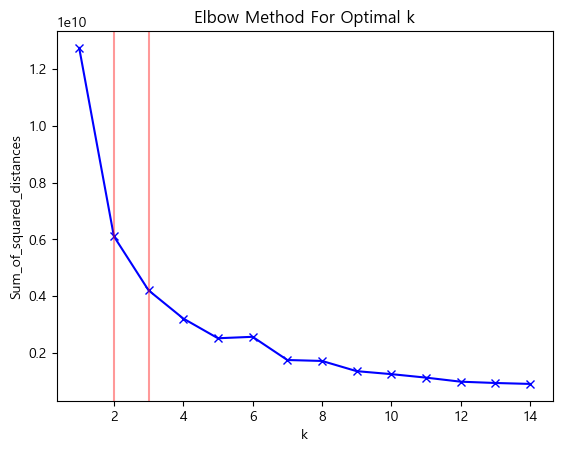

In [138]:
from sklearn.cluster import KMeans

# # 군집분석에 사용할 피처 선택
# features = grouped.drop(columns=['대여대여소ID'])

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(features)
    sum_of_squared_distances.append(km.inertia_)
    
# 시각화

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

In [139]:
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(features)
  clusters = kmeans.predict(features)

  score = silhouette_score(features, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.5859813557595944
k : 3 score : 0.46252569834593826
k : 4 score : 0.42627474767742846
k : 5 score : 0.4396390887003232
k : 6 score : 0.42642627689897433
k : 7 score : 0.3886246695201724
k : 8 score : 0.3786767354457498
k : 9 score : 0.36149019937405097
k : 10 score : 0.3625252089320405
k : 11 score : 0.37362008549473263
k : 12 score : 0.3613642276562695
k : 13 score : 0.3617205187544004
best n : 2 best score : 0.5859813557595944


In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 군집분석에 사용할 피처 선택
features = grouped.drop(columns=['대여대여소ID'])

# 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-means 군집분석
kmeans = KMeans(n_clusters=4, random_state=42)
grouped['군집'] = kmeans.fit_predict(scaled_features)

# PCA 적용
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# PCA 결과를 데이터프레임에 추가
grouped['PCA1'] = pca_features[:, 0]
grouped['PCA2'] = pca_features[:, 1]

# 결과 출력
print(grouped)

      대여대여소ID  총대여횟수    남성고객비율     평균이용시간       평균이용거리    주말대여비율    새벽대여비율  \
0       ST-10   2764  0.641823  30.027135  2896.118784  0.308249  0.099493   
1     ST-1000   3074  0.625895  19.268705  2427.495573  0.265777  0.036760   
2     ST-1002   5895  0.658863  20.319932  2289.621218  0.298049  0.013740   
3     ST-1003   1914  0.641066  17.774817  2121.170564  0.269592  0.060084   
4     ST-1004   1543  0.736876  15.806870  1868.960045  0.288399  0.038885   
5     ST-1005   5385  0.666295  16.411513  2028.707627  0.268152  0.043825   
6     ST-1006   5129  0.584909  17.895301  2063.188239  0.254046  0.037044   
7     ST-1007   1738  0.702532  19.873418  2323.346559  0.242232  0.107020   
8     ST-1008   1562  0.620999  17.128681  2057.830787  0.255442  0.090909   
9     ST-1010   2686  0.615041  17.107967  2060.121754  0.237156  0.084885   
10    ST-1011   1591  0.698931  17.680075  2151.094519  0.241986  0.108737   
11    ST-1012    781  0.580026  20.120359  2546.327324  0.199744

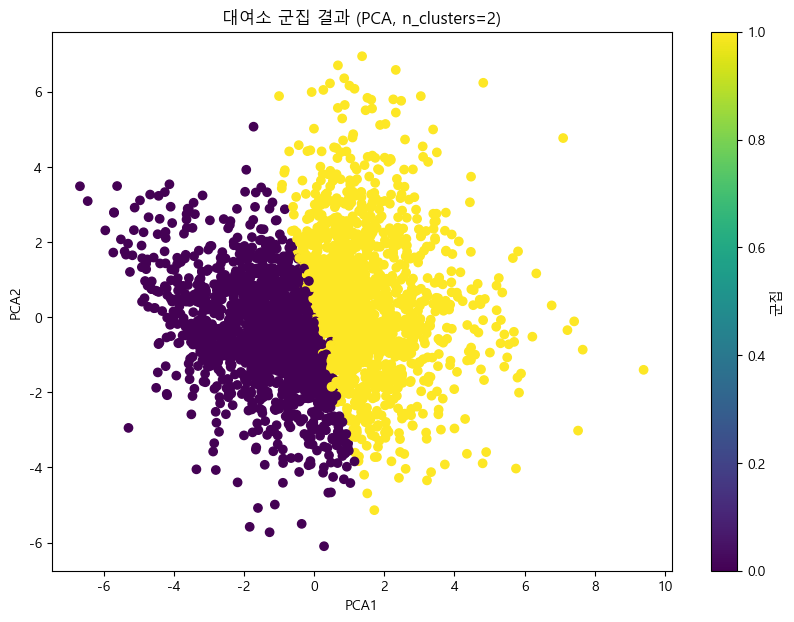

n_clusters = 2일 때 각 군집의 평균 값:


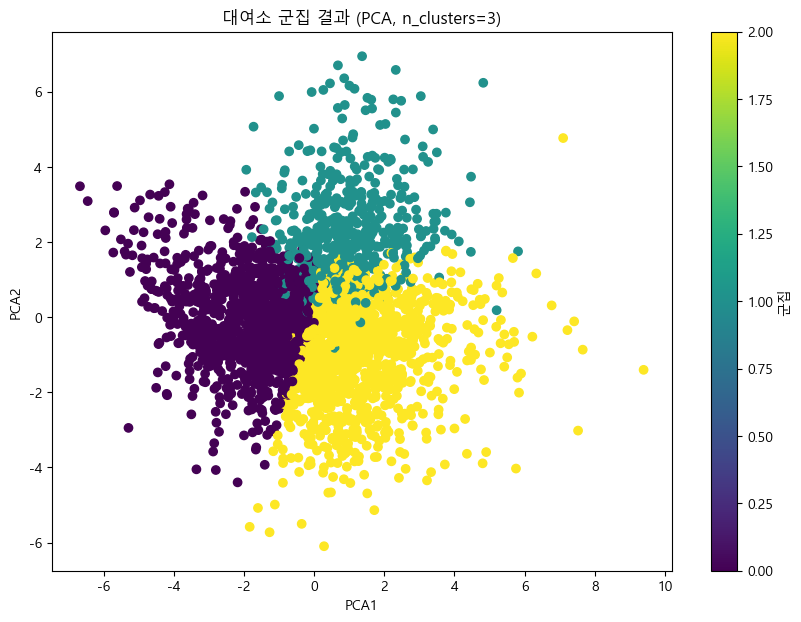

n_clusters = 3일 때 각 군집의 평균 값:


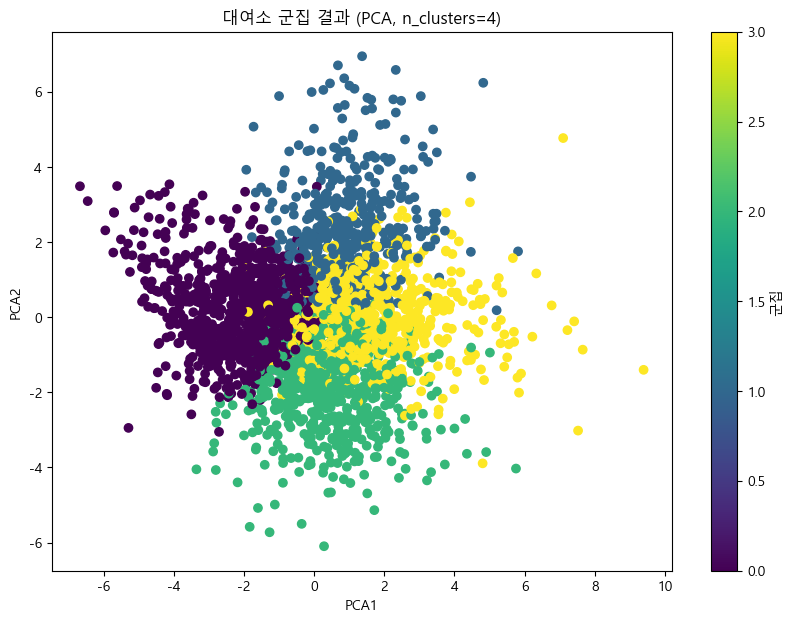

n_clusters = 4일 때 각 군집의 평균 값:


n_clusters = 2일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   0
1     ST-1000   1
2     ST-1002   1
3     ST-1003   1
4     ST-1004   1
5     ST-1005   1
6     ST-1006   1
7     ST-1007   1
8     ST-1008   1
9     ST-1010   1
10    ST-1011   1
11    ST-1012   1
12    ST-1013   0
13    ST-1014   1
14    ST-1015   1
15    ST-1016   1
16    ST-1017   1
17    ST-1018   1
18    ST-1019   0
19     ST-102   0
20    ST-1020   0
21    ST-1023   1
22    ST-1024   1
23    ST-1025   0
24    ST-1027   1
25    ST-1028   1
26    ST-1029   0
27     ST-103   0
28    ST-1031   1
29    ST-1032   1
30    ST-1033   0
31    ST-1034   0
32    ST-1035   0
33    ST-1036   1
34    ST-1038   0
35    ST-1039   0
36    ST-1040   1
37    ST-1041   0
38    ST-1042   1
39    ST-1044   0
40    ST-1045   0
41    ST-1046   0
42    ST-1047   0
43    ST-1048   1
44    ST-1049   1
45     ST-105   0
46    ST-1050   1
47    ST-1051   1
48    ST-1053   1
49    ST-1054   1
50    ST-1055   1
51    ST-1056   1
52    ST-1058 

In [141]:
# 변수 초기화
cluster_results = {}

# n_clusters 값을 2, 3, 4로 설정하여 K-means 군집분석 및 시각화
for n_clusters in [2, 3, 4]:
    # K-means 군집분석
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    grouped['군집'] = kmeans.fit_predict(scaled_features)

    # PCA 적용
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(scaled_features)

    # PCA 결과를 데이터프레임에 추가
    grouped['PCA1'] = pca_features[:, 0]
    grouped['PCA2'] = pca_features[:, 1]

    # 군집 시각화
    plt.figure(figsize=(10, 7))
    plt.scatter(grouped['PCA1'], grouped['PCA2'], c=grouped['군집'], cmap='viridis')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title(f'대여소 군집 결과 (PCA, n_clusters={n_clusters})')
    plt.colorbar(label='군집')
    plt.show()
    
    # 각 군집의 평균 값 계산 (대여대여소ID 제외)
    grouped_means = grouped.drop(columns=['대여대여소ID', 'PCA1', 'PCA2']).groupby('군집').mean()

    # # 컬럼 별로 가장 높은 값을 가진 군집의 셀에 파란색 배경 추가
    # def highlight_max(s):
    #     is_max = s == s.max()
    #     return ['background-color: #ccffcc' if v else '' for v in is_max]

    # styled_means = grouped_means.style.apply(highlight_max)
    
    # 컬럼 별로 가장 높은 값을 가진 군집의 셀에 연한 초록색 배경 추가
    def highlight_max(s):
        is_max = s == s.max()
        return ['background-color: #ccffcc' if v else '' for v in is_max]

    # 컬럼 별로 가장 낮은 값을 가진 군집의 셀에 연한 노랑색 배경 추가
    def highlight_min(s):
        is_min = s == s.min()
        return ['background-color: #fffff0' if v else '' for v in is_min]

    styled_means = grouped_means.style.apply(highlight_max).apply(highlight_min)

    
    # 결과 출력
    print(f"n_clusters = {n_clusters}일 때 각 군집의 평균 값:")
    display(styled_means)
    
    # 각 대여소가 속한 군집 저장
    cluster_results[f'cluster_{n_clusters}'] = grouped[['대여대여소ID', '군집']].copy()

# 결과 데이터프레임 확인
df_ins_2 = cluster_results['cluster_2']
df_ins_3 = cluster_results['cluster_3']
df_ins_4 = cluster_results['cluster_4']

print("n_clusters = 2일 때 각 대여소가 속한 군집:")
print(df_ins_2)

print("n_clusters = 3일 때 각 대여소가 속한 군집:")
print(df_ins_3)

print("n_clusters = 4일 때 각 대여소가 속한 군집:")
print(df_ins_4)

(마스터 정보와 조인해서 저장하기)

In [142]:
in_k_2 = pd.merge(df_ins_2, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')
in_k_2 = in_k_2.drop(columns=['대여소_ID'])
in_k_2.columns = ['대여소ID', '군집', '위도', '경도', '구']
in_k_2.head()

대여소ID  군집        위도         경도    구
0    ST-10   0  37.55275  126.91862  마포구
1  ST-1000   1  37.51038  126.86680  양천구
2  ST-1002   1  37.52990  126.87654  양천구
3  ST-1003   1  37.53955  126.82830  양천구
4  ST-1004   1  37.51410  126.83100  양천구

In [143]:
in_k_2.to_csv('./(군집_내국인_k=2_청12복) 서울시 따릉이 대여소 별 군집결과_마스터 조인.csv', index=False)

In [144]:
in_k_3 = pd.merge(df_ins_3, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')
in_k_3 = in_k_3.drop(columns=['대여소_ID'])
in_k_3.columns = ['대여소ID', '군집', '위도', '경도', '구']
in_k_3.head()

대여소ID  군집        위도         경도    구
0    ST-10   0  37.55275  126.91862  마포구
1  ST-1000   1  37.51038  126.86680  양천구
2  ST-1002   1  37.52990  126.87654  양천구
3  ST-1003   1  37.53955  126.82830  양천구
4  ST-1004   1  37.51410  126.83100  양천구

In [145]:
in_k_3.to_csv('./(군집_내국인_k=3_청12복) 서울시 따릉이 대여소 별 군집결과_마스터 조인.csv', index=False)

In [146]:
in_k_4 = pd.merge(df_ins_4, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')
in_k_4 = in_k_4.drop(columns=['대여소_ID'])
in_k_4.columns = ['대여소ID', '군집', '위도', '경도', '구']
in_k_4.head()

대여소ID  군집        위도         경도    구
0    ST-10   0  37.55275  126.91862  마포구
1  ST-1000   1  37.51038  126.86680  양천구
2  ST-1002   1  37.52990  126.87654  양천구
3  ST-1003   1  37.53955  126.82830  양천구
4  ST-1004   1  37.51410  126.83100  양천구

In [147]:
in_k_4.to_csv('./(군집_내국인_k=4_청12복) 서울시 따릉이 대여소 별 군집결과_마스터 조인.csv', index=False)

#### 비율..인데 좀 덜 세분화한..버전으로다가..  
주중/주말 연령대 컬럼 세분화하지 말고 그냥 연령대 별 청소년, 청년, 장년, 노인만 나눠보기

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df1_ins['대여일자'] = pd.to_datetime(df1_ins['대여일자'])

# 주중/주말 구분
df1_ins['주말여부'] = df1_ins['대여요일'].isin(['Saturday', 'Sunday'])

# 시간대 구분
df1_ins['새벽시간'] = (df1_ins['대여시간'] >= 0) & (df1_ins['대여시간'] < 6)
df1_ins['출근시간'] = (df1_ins['대여시간'] >= 7) & (df1_ins['대여시간'] < 10)
df1_ins['오전시간'] = (df1_ins['대여시간'] >= 10) & (df1_ins['대여시간'] < 12)
df1_ins['점심시간'] = (df1_ins['대여시간'] >= 12) & (df1_ins['대여시간'] < 14)
df1_ins['오후시간'] = (df1_ins['대여시간'] >= 14) & (df1_ins['대여시간'] < 17)
df1_ins['퇴근시간'] = (df1_ins['대여시간'] >= 17) & (df1_ins['대여시간'] < 19)
df1_ins['야간시간'] = (df1_ins['대여시간'] >= 19) & (df1_ins['대여시간'] < 24)

# 연령대 구분
df1_ins['청소년'] = (df1_ins['연령대'] == 10)
df1_ins['청년'] = (df1_ins['연령대'] == 20) | (df1_ins['연령대'] == 30)
df1_ins['장년'] = (df1_ins['연령대'] == 40) | (df1_ins['연령대'] == 50)
df1_ins['노인'] = (df1_ins['연령대'] == 60) | (df1_ins['연령대'] == 70)

# 대여대여소ID 기준 그룹화하여 통계 피처 생성
total_counts = df1_ins.groupby('대여대여소ID')['대여일자'].count()

grouped = df1_ins.groupby('대여대여소ID').agg({
    '대여일자': 'count',  # 총 대여 횟수
    '성별_M': 'mean',  # 남성 방문고객 비율
    '이용시간(분)': 'mean',  # 평균 이용시간
    '이용거리(M)': 'mean',  # 평균 이용거리
    '주말여부': lambda x: x.sum() / x.count(),  # 주말 대여 비율
    '새벽시간': lambda x: x.sum() / x.count(),  # 새벽 대여 비율
    '출근시간': lambda x: x.sum() / x.count(),  # 출근 시간대 대여 비율
    '오전시간': lambda x: x.sum() / x.count(),  # 오전 대여 비율
    '점심시간': lambda x: x.sum() / x.count(),  # 점심시간 대여 비율
    '오후시간': lambda x: x.sum() / x.count(),  # 오후시간 대여 비율
    '퇴근시간': lambda x: x.sum() / x.count(),  # 퇴근 시간대 대여 비율
    '야간시간': lambda x: x.sum() / x.count(),   # 야간 대여 비율
    '청소년' : lambda x: x.sum() / x.count(),   # 청소년 비율
    '청년' : lambda x: x.sum() / x.count(),     # 청년 비율
    '장년' : lambda x: x.sum() / x.count(),     # 장년 비율
    '노인' : lambda x: x.sum() / x.count()      # 노인 비율
}).reset_index()

# 컬럼 이름 변경
grouped.columns = [
    '대여대여소ID', '총대여횟수', '남성고객비율', '평균이용시간', '평균이용거리',
    '주말대여비율', '새벽대여비율', '출근시간대여비율', '오전대여비율', '점심대여비율', '오후대여비율',
    '퇴근시간대여비율', '야간대여비율', '청소년비율', '청년비율', '장년비율', '노인비율'
]

print(grouped)

      대여대여소ID  총대여횟수    남성고객비율     평균이용시간       평균이용거리    주말대여비율    새벽대여비율  \
0       ST-10   2764  0.641823  30.027135  2896.118784  0.308249  0.099493   
1     ST-1000   3074  0.625895  19.268705  2427.495573  0.265777  0.036760   
2     ST-1002   5895  0.658863  20.319932  2289.621218  0.298049  0.013740   
3     ST-1003   1914  0.641066  17.774817  2121.170564  0.269592  0.060084   
4     ST-1004   1543  0.736876  15.806870  1868.960045  0.288399  0.038885   
...       ...    ...       ...        ...          ...       ...       ...   
2748   ST-993   2288  0.677885  18.303759  1884.028086  0.255682  0.042832   
2749   ST-994   4450  0.640225  20.783820  2037.581463  0.224045  0.014607   
2750   ST-995    467  0.698073  18.715203  2259.101649  0.241970  0.008565   
2751   ST-996   1075  0.709767  20.463256  1966.129544  0.279070  0.097674   
2752   ST-997   6979  0.640923  18.015618  1877.363578  0.252472  0.028084   

      출근시간대여비율    오전대여비율    점심대여비율    오후대여비율  퇴근시간대여비율    야간대여비

In [6]:
grouped = grouped.dropna()

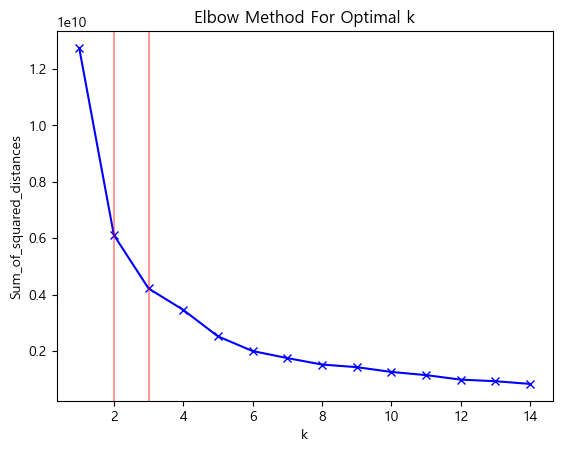

In [8]:
from sklearn.cluster import KMeans

# # 군집분석에 사용할 피처 선택
features = grouped.drop(columns=['대여대여소ID'])

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(features)
    sum_of_squared_distances.append(km.inertia_)
    
# 시각화

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

In [152]:
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(features)
  clusters = kmeans.predict(features)

  score = silhouette_score(features, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.5859813545786464
k : 3 score : 0.4626715228955522
k : 4 score : 0.4262747450091651
k : 5 score : 0.43963908555833203
k : 6 score : 0.42642627285678675
k : 7 score : 0.38862466454525346
k : 8 score : 0.3786767302673371
k : 9 score : 0.3617073796403045
k : 10 score : 0.36252520196377197
k : 11 score : 0.3736200781240138
k : 12 score : 0.3613642190710511
k : 13 score : 0.3617205101689882
best n : 2 best score : 0.5859813545786464


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 군집분석에 사용할 피처 선택
features = grouped.drop(columns=['대여대여소ID'])

# 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-means 군집분석
kmeans = KMeans(n_clusters=4, random_state=42)
grouped['군집'] = kmeans.fit_predict(scaled_features)

# PCA 적용
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# PCA 결과를 데이터프레임에 추가
grouped['PCA1'] = pca_features[:, 0]
grouped['PCA2'] = pca_features[:, 1]

# 결과 출력
print(grouped)

      대여대여소ID  총대여횟수    남성고객비율     평균이용시간       평균이용거리    주말대여비율    새벽대여비율  \
0       ST-10   2764  0.641823  30.027135  2896.118784  0.308249  0.099493   
1     ST-1000   3074  0.625895  19.268705  2427.495573  0.265777  0.036760   
2     ST-1002   5895  0.658863  20.319932  2289.621218  0.298049  0.013740   
3     ST-1003   1914  0.641066  17.774817  2121.170564  0.269592  0.060084   
4     ST-1004   1543  0.736876  15.806870  1868.960045  0.288399  0.038885   
...       ...    ...       ...        ...          ...       ...       ...   
2748   ST-993   2288  0.677885  18.303759  1884.028086  0.255682  0.042832   
2749   ST-994   4450  0.640225  20.783820  2037.581463  0.224045  0.014607   
2750   ST-995    467  0.698073  18.715203  2259.101649  0.241970  0.008565   
2751   ST-996   1075  0.709767  20.463256  1966.129544  0.279070  0.097674   
2752   ST-997   6979  0.640923  18.015618  1877.363578  0.252472  0.028084   

      출근시간대여비율    오전대여비율    점심대여비율    오후대여비율  퇴근시간대여비율    야간대여비

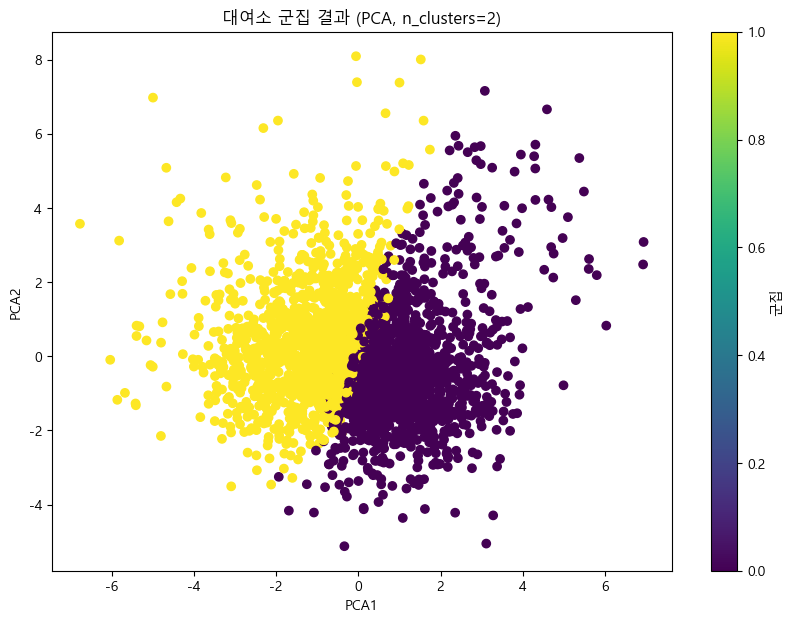

n_clusters = 2일 때 각 군집의 평균 값:


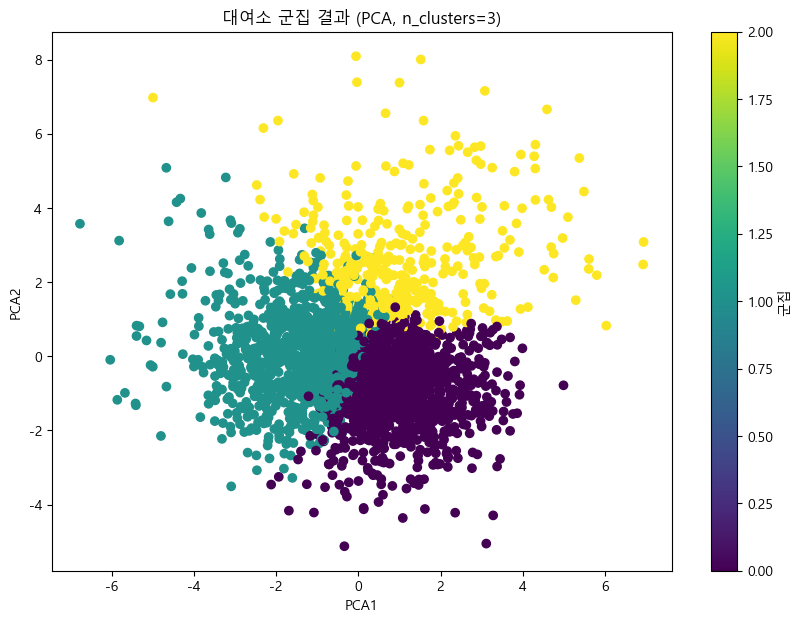

n_clusters = 3일 때 각 군집의 평균 값:


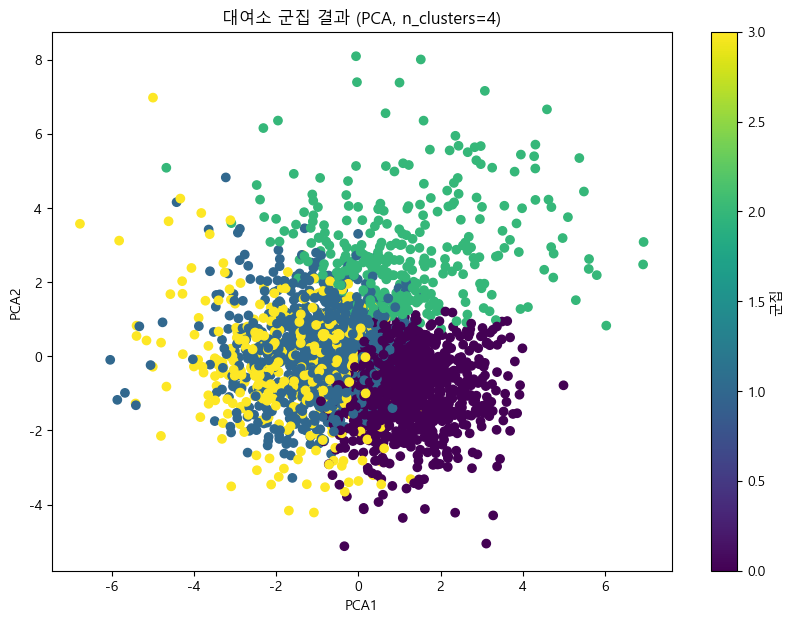

n_clusters = 4일 때 각 군집의 평균 값:


n_clusters = 2일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   0
1     ST-1000   1
2     ST-1002   0
3     ST-1003   0
4     ST-1004   1
...       ...  ..
2748   ST-993   1
2749   ST-994   0
2750   ST-995   1
2751   ST-996   0
2752   ST-997   1

[2753 rows x 2 columns]
n_clusters = 3일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   0
1     ST-1000   1
2     ST-1002   0
3     ST-1003   0
4     ST-1004   1
...       ...  ..
2748   ST-993   1
2749   ST-994   0
2750   ST-995   1
2751   ST-996   0
2752   ST-997   1

[2753 rows x 2 columns]
n_clusters = 4일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   0
1     ST-1000   1
2     ST-1002   0
3     ST-1003   0
4     ST-1004   1
...       ...  ..
2748   ST-993   1
2749   ST-994   0
2750   ST-995   1
2751   ST-996   0
2752   ST-997   1

[2753 rows x 2 columns]


In [10]:
# 변수 초기화
cluster_results = {}

# n_clusters 값을 2, 3, 4로 설정하여 K-means 군집분석 및 시각화
for n_clusters in [2, 3, 4]:
    # K-means 군집분석
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    grouped['군집'] = kmeans.fit_predict(scaled_features)

    # PCA 적용
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(scaled_features)

    # PCA 결과를 데이터프레임에 추가
    grouped['PCA1'] = pca_features[:, 0]
    grouped['PCA2'] = pca_features[:, 1]

    # 군집 시각화
    plt.figure(figsize=(10, 7))
    plt.scatter(grouped['PCA1'], grouped['PCA2'], c=grouped['군집'], cmap='viridis')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title(f'대여소 군집 결과 (PCA, n_clusters={n_clusters})')
    plt.colorbar(label='군집')
    plt.show()
    
    # 각 군집의 평균 값 계산 (대여대여소ID 제외)
    grouped_means = grouped.drop(columns=['대여대여소ID', 'PCA1', 'PCA2']).groupby('군집').mean()

    # # 컬럼 별로 가장 높은 값을 가진 군집의 셀에 파란색 배경 추가
    # def highlight_max(s):
    #     is_max = s == s.max()
    #     return ['background-color: #ccffcc' if v else '' for v in is_max]

    # styled_means = grouped_means.style.apply(highlight_max)
    
    # 컬럼 별로 가장 높은 값을 가진 군집의 셀에 연한 초록색 배경 추가
    def highlight_max(s):
        is_max = s == s.max()
        return ['background-color: #ccffcc' if v else '' for v in is_max]

    # 컬럼 별로 가장 낮은 값을 가진 군집의 셀에 연한 노랑색 배경 추가
    def highlight_min(s):
        is_min = s == s.min()
        return ['background-color: #fffff0' if v else '' for v in is_min]

    styled_means = grouped_means.style.apply(highlight_max).apply(highlight_min)

    
    # 결과 출력
    print(f"n_clusters = {n_clusters}일 때 각 군집의 평균 값:")
    display(styled_means)
    
    # 각 대여소가 속한 군집 저장
    cluster_results[f'cluster_{n_clusters}'] = grouped[['대여대여소ID', '군집']].copy()

# 결과 데이터프레임 확인
df_ins_2 = cluster_results['cluster_2']
df_ins_3 = cluster_results['cluster_3']
df_ins_4 = cluster_results['cluster_4']

print("n_clusters = 2일 때 각 대여소가 속한 군집:")
print(df_ins_2)

print("n_clusters = 3일 때 각 대여소가 속한 군집:")
print(df_ins_3)

print("n_clusters = 4일 때 각 대여소가 속한 군집:")
print(df_ins_4)

In [155]:
in_k_2_ = pd.merge(df_ins_2, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')
in_k_2_ = in_k_2_.drop(columns=['대여소_ID'])
in_k_2_.columns = ['대여소ID', '군집', '위도', '경도', '구']
in_k_2_.head()

대여소ID  군집        위도         경도    구
0    ST-10   0  37.55275  126.91862  마포구
1  ST-1000   1  37.51038  126.86680  양천구
2  ST-1002   0  37.52990  126.87654  양천구
3  ST-1003   0  37.53955  126.82830  양천구
4  ST-1004   1  37.51410  126.83100  양천구

In [156]:
in_k_2_.to_csv('./(군집_내국인_k=2_청합간) 서울시 따릉이 대여소 별 군집결과_마스터 조인.csv', index=False)

In [157]:
in_k_3_ = pd.merge(df_ins_3, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')
in_k_3_ = in_k_3_.drop(columns=['대여소_ID'])
in_k_3_.columns = ['대여소ID', '군집', '위도', '경도', '구']
in_k_3_.head()

대여소ID  군집        위도         경도    구
0    ST-10   0  37.55275  126.91862  마포구
1  ST-1000   1  37.51038  126.86680  양천구
2  ST-1002   0  37.52990  126.87654  양천구
3  ST-1003   0  37.53955  126.82830  양천구
4  ST-1004   1  37.51410  126.83100  양천구

In [158]:
in_k_3_.to_csv('./(군집_내국인_k=3_청합간) 서울시 따릉이 대여소 별 군집결과_마스터 조인.csv', index=False)

In [159]:
in_k_4_ = pd.merge(df_ins_4, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')
in_k_4_ = in_k_4_.drop(columns=['대여소_ID'])
in_k_4_.columns = ['대여소ID', '군집', '위도', '경도', '구']
in_k_4_.head()

대여소ID  군집        위도         경도    구
0    ST-10   0  37.55275  126.91862  마포구
1  ST-1000   1  37.51038  126.86680  양천구
2  ST-1002   0  37.52990  126.87654  양천구
3  ST-1003   0  37.53955  126.82830  양천구
4  ST-1004   1  37.51410  126.83100  양천구

In [160]:
in_k_4_.to_csv('./(군집_내국인_k=4_청합간) 서울시 따릉이 대여소 별 군집결과_마스터 조인.csv', index=False)

##### 방사형 그래프

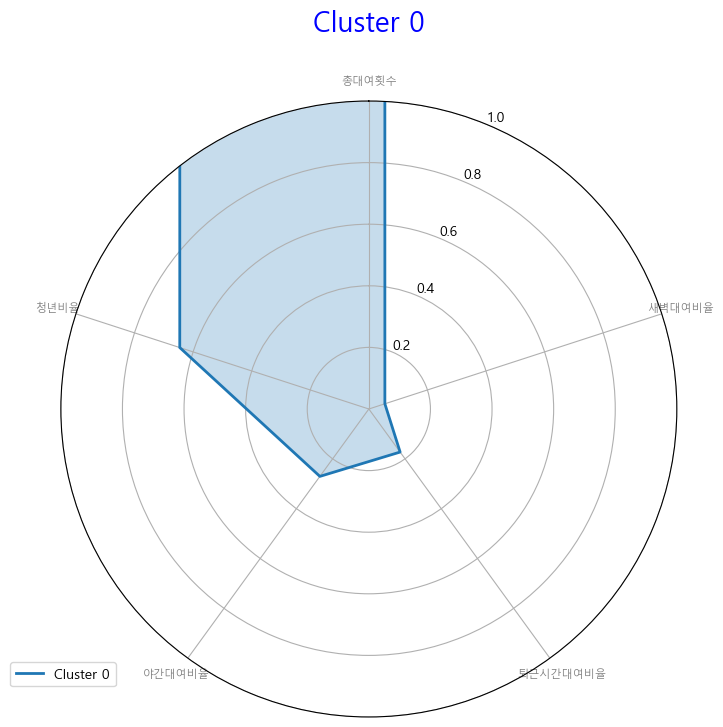

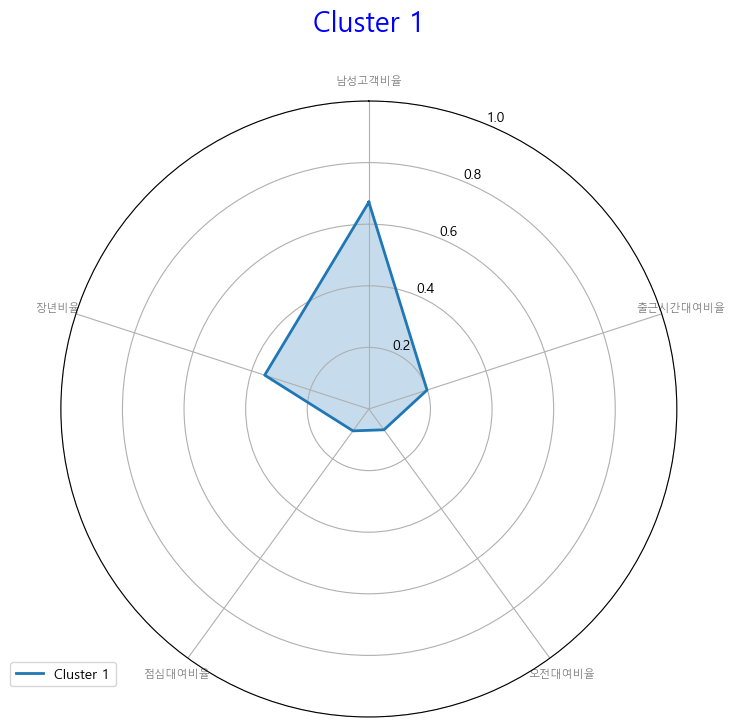

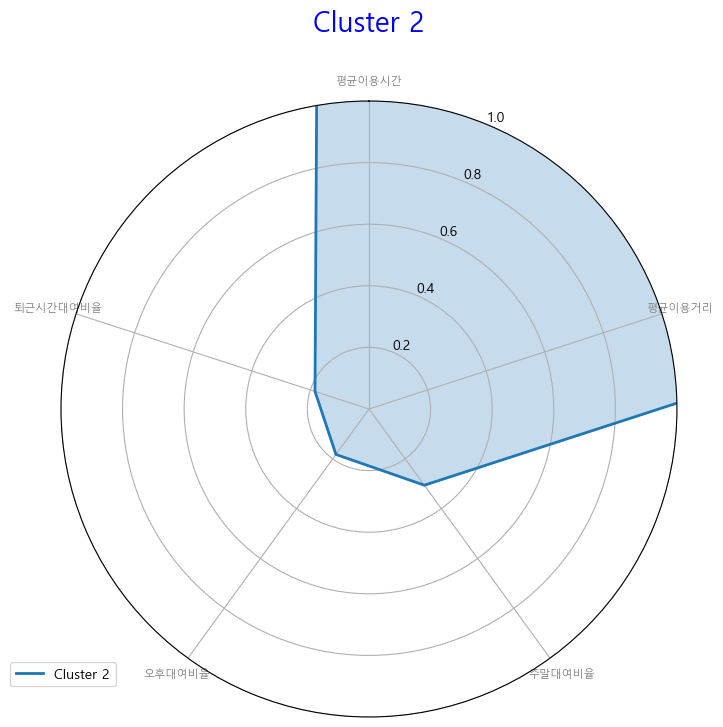

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# k=3일 때 군집 정보를 사용하기 위해 군집 평균값 계산
kmeans = KMeans(n_clusters=3, random_state=42)
grouped['군집'] = kmeans.fit_predict(scaled_features)

# 군집별 평균 값 계산 (대여대여소ID, PCA1, PCA2 제외)
grouped_means = grouped.drop(columns=['대여대여소ID', 'PCA1', 'PCA2']).groupby('군집').mean()

# 방사형 그래프 그리기 위한 설정
cluster_features = {
    0: ['총대여횟수', '새벽대여비율', '퇴근시간대여비율', '야간대여비율', '청년비율'],
    1: ['남성고객비율', '출근시간대여비율', '오전대여비율', '점심대여비율', '장년비율'],
    2: ['평균이용시간', '평균이용거리', '주말대여비율', '오후대여비율', '퇴근시간대여비율']
}

# 방사형 그래프 그리기
for cluster, features in cluster_features.items():
    values = grouped_means.loc[cluster, features].values.flatten().tolist()
    values += values[:1]
    
    num_vars = len(features)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], features, color='grey', size=8)
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.25)
    
    # 각도 축의 범위를 조정하여 더 낮은 값을 기준으로 설정
    ax.set_ylim(0, 1)  # 0에서 1 사이의 값으로 스케일을 조정
    
    plt.title(f'Cluster {cluster}', size=20, color='blue', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()



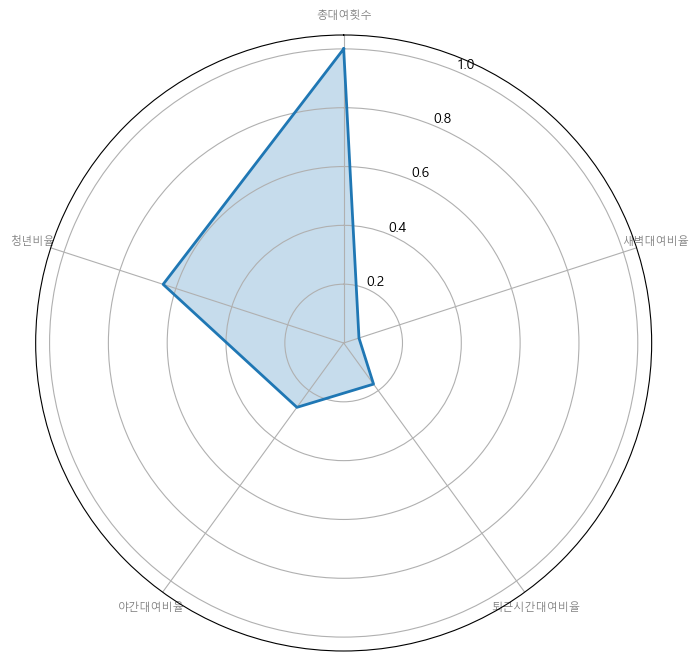

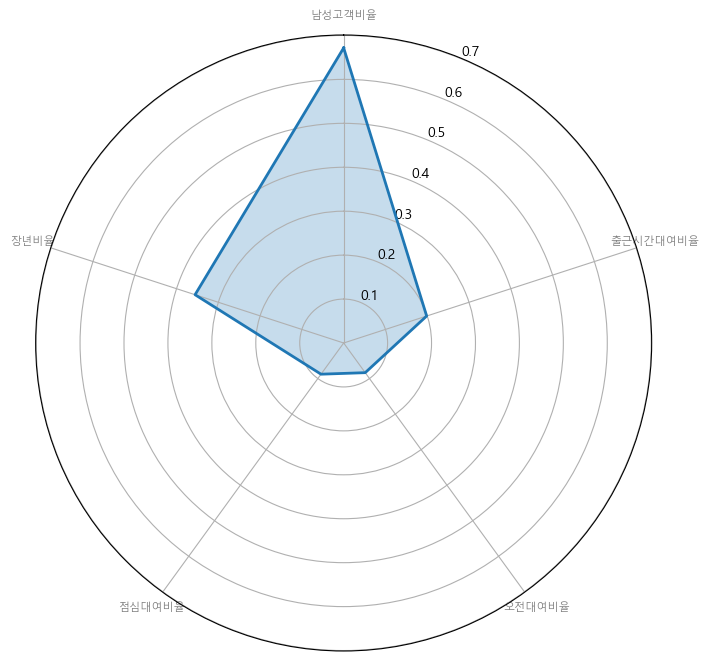

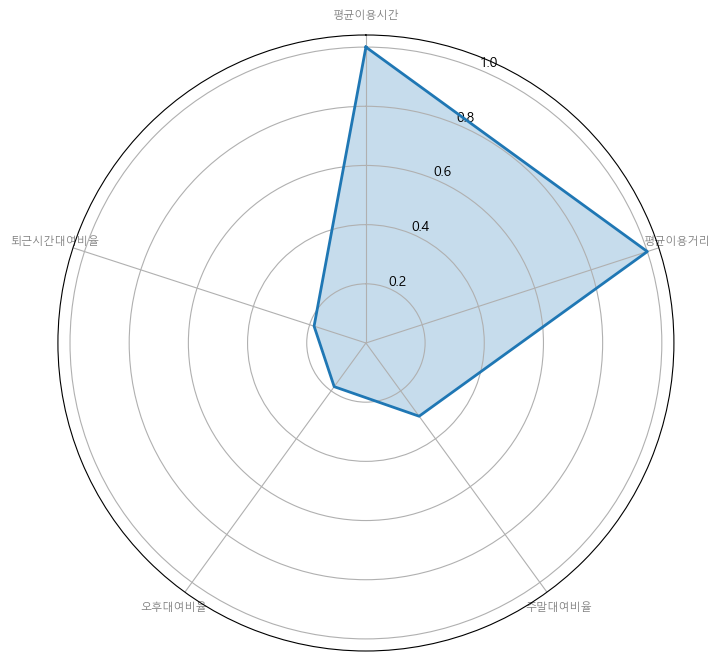

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 데이터 로드 및 전처리
df1_ins['대여일자'] = pd.to_datetime(df1_ins['대여일자'])

# 주중/주말 구분
df1_ins['주말여부'] = df1_ins['대여요일'].isin(['Saturday', 'Sunday'])

# 시간대 구분
df1_ins['새벽시간'] = (df1_ins['대여시간'] >= 0) & (df1_ins['대여시간'] < 6)
df1_ins['출근시간'] = (df1_ins['대여시간'] >= 7) & (df1_ins['대여시간'] < 10)
df1_ins['오전시간'] = (df1_ins['대여시간'] >= 10) & (df1_ins['대여시간'] < 12)
df1_ins['점심시간'] = (df1_ins['대여시간'] >= 12) & (df1_ins['대여시간'] < 14)
df1_ins['오후시간'] = (df1_ins['대여시간'] >= 14) & (df1_ins['대여시간'] < 17)
df1_ins['퇴근시간'] = (df1_ins['대여시간'] >= 17) & (df1_ins['대여시간'] < 19)
df1_ins['야간시간'] = (df1_ins['대여시간'] >= 19) & (df1_ins['대여시간'] < 24)

# 연령대 구분
df1_ins['청소년'] = (df1_ins['연령대'] == 10)
df1_ins['청년'] = (df1_ins['연령대'] == 20) | (df1_ins['연령대'] == 30)
df1_ins['장년'] = (df1_ins['연령대'] == 40) | (df1_ins['연령대'] == 50)
df1_ins['노인'] = (df1_ins['연령대'] == 60) | (df1_ins['연령대'] == 70)

# 대여대여소ID 기준 그룹화하여 통계 피처 생성
total_counts = df1_ins.groupby('대여대여소ID')['대여일자'].count()

grouped = df1_ins.groupby('대여대여소ID').agg({
    '대여일자': 'count',  # 총 대여 횟수
    '성별_M': 'mean',  # 남성 방문고객 비율
    '이용시간(분)': 'mean',  # 평균 이용시간
    '이용거리(M)': 'mean',  # 평균 이용거리
    '주말여부': lambda x: x.sum() / x.count(),  # 주말 대여 비율
    '새벽시간': lambda x: x.sum() / x.count(),  # 새벽 대여 비율
    '출근시간': lambda x: x.sum() / x.count(),  # 출근 시간대 대여 비율
    '오전시간': lambda x: x.sum() / x.count(),  # 오전 대여 비율
    '점심시간': lambda x: x.sum() / x.count(),  # 점심시간 대여 비율
    '오후시간': lambda x: x.sum() / x.count(),  # 오후시간 대여 비율
    '퇴근시간': lambda x: x.sum() / x.count(),  # 퇴근 시간대 대여 비율
    '야간시간': lambda x: x.sum() / x.count(),   # 야간 대여 비율
    '청소년' : lambda x: x.sum() / x.count(),   # 청소년 비율
    '청년' : lambda x: x.sum() / x.count(),     # 청년 비율
    '장년' : lambda x: x.sum() / x.count(),     # 장년 비율
    '노인' : lambda x: x.sum() / x.count()      # 노인 비율
}).reset_index()

# 컬럼 이름 변경
grouped.columns = [
    '대여대여소ID', '총대여횟수', '남성고객비율', '평균이용시간', '평균이용거리',
    '주말대여비율', '새벽대여비율', '출근시간대여비율', '오전대여비율', '점심대여비율', '오후대여비율',
    '퇴근시간대여비율', '야간대여비율', '청소년비율', '청년비율', '장년비율', '노인비율'
]

# 군집분석에 사용할 피처 선택
features = grouped.drop(columns=['대여대여소ID'])

# 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-means 군집분석
kmeans = KMeans(n_clusters=3, random_state=42)
grouped['군집'] = kmeans.fit_predict(scaled_features)

# 군집별 평균 값 계산 (대여대여소ID 제외)
grouped_means = grouped.drop(columns=['대여대여소ID']).groupby('군집').mean()

# 총대여횟수, 평균이용시간, 평균이용거리 비율로 변환
grouped_means['총대여횟수'] = grouped_means['총대여횟수'] / grouped_means['총대여횟수'].max()
grouped_means['평균이용시간'] = grouped_means['평균이용시간'] / grouped_means['평균이용시간'].max()
grouped_means['평균이용거리'] = grouped_means['평균이용거리'] / grouped_means['평균이용거리'].max()

# 방사형 그래프 그리기 위한 설정
cluster_features = {
    0: ['총대여횟수', '새벽대여비율', '퇴근시간대여비율', '야간대여비율', '청년비율'],
    1: ['남성고객비율', '출근시간대여비율', '오전대여비율', '점심대여비율', '장년비율'],
    2: ['평균이용시간', '평균이용거리', '주말대여비율', '오후대여비율', '퇴근시간대여비율']
}

# 방사형 그래프 그리기
for cluster, features in cluster_features.items():
    values = grouped_means.loc[cluster, features].values.flatten().tolist()
    values += values[:1]
    
    num_vars = len(features)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], features, color='grey', size=8)
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.25)
    
    #plt.title(f'Cluster {cluster}', size=20, color='blue', y=1.1)
    #plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()


#### 한 번만 더.. 20대랑 30대는 좀 다른 양상이니까!

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df1_ins['대여일자'] = pd.to_datetime(df1_ins['대여일자'])

# 주중/주말 구분
df1_ins['주말여부'] = df1_ins['대여요일'].isin(['Saturday', 'Sunday'])

# 시간대 구분
df1_ins['새벽시간'] = (df1_ins['대여시간'] >= 0) & (df1_ins['대여시간'] < 6)
df1_ins['출근시간'] = (df1_ins['대여시간'] >= 7) & (df1_ins['대여시간'] < 10)
df1_ins['오전시간'] = (df1_ins['대여시간'] >= 10) & (df1_ins['대여시간'] < 12)
df1_ins['점심시간'] = (df1_ins['대여시간'] >= 12) & (df1_ins['대여시간'] < 14)
df1_ins['오후시간'] = (df1_ins['대여시간'] >= 14) & (df1_ins['대여시간'] < 17)
df1_ins['퇴근시간'] = (df1_ins['대여시간'] >= 17) & (df1_ins['대여시간'] < 19)
df1_ins['야간시간'] = (df1_ins['대여시간'] >= 19) & (df1_ins['대여시간'] < 24)

# 연령대 구분
df1_ins['청소년'] = (df1_ins['연령대'] == 10)
df1_ins['청년1'] = (df1_ins['연령대'] == 20)
df1_ins['청년2'] = (df1_ins['연령대'] == 30)
df1_ins['장년'] = (df1_ins['연령대'] == 40) | (df1_ins['연령대'] == 50)
df1_ins['노인'] = (df1_ins['연령대'] == 60) | (df1_ins['연령대'] == 70)

# 대여대여소ID 기준 그룹화하여 통계 피처 생성
total_counts = df1_ins.groupby('대여대여소ID')['대여일자'].count()

grouped = df1_ins.groupby('대여대여소ID').agg({
    '대여일자': 'count',  # 총 대여 횟수
    '성별_M': 'mean',  # 남성 방문고객 비율
    '이용시간(분)': 'mean',  # 평균 이용시간
    '이용거리(M)': 'mean',  # 평균 이용거리
    '주말여부': lambda x: x.sum() / x.count(),  # 주말 대여 비율
    '새벽시간': lambda x: x.sum() / x.count(),  # 새벽 대여 비율
    '출근시간': lambda x: x.sum() / x.count(),  # 출근 시간대 대여 비율
    '오전시간': lambda x: x.sum() / x.count(),  # 오전 대여 비율
    '점심시간': lambda x: x.sum() / x.count(),  # 점심시간 대여 비율
    '오후시간': lambda x: x.sum() / x.count(),  # 오후시간 대여 비율
    '퇴근시간': lambda x: x.sum() / x.count(),  # 퇴근 시간대 대여 비율
    '야간시간': lambda x: x.sum() / x.count(),   # 야간 대여 비율
    '청소년' : lambda x: x.sum() / x.count(),   # 청소년 비율
    '청년1' : lambda x: x.sum() / x.count(),    # 청년1 비율
    '청년2' : lambda x: x.sum() / x.count(),    # 청년2 비율
    '장년' : lambda x: x.sum() / x.count(),     # 장년 비율
    '노인' : lambda x: x.sum() / x.count()      # 노인 비율
}).reset_index()

# 컬럼 이름 변경
grouped.columns = [
    '대여대여소ID', '총대여횟수', '남성고객비율', '평균이용시간', '평균이용거리',
    '주말대여비율', '새벽대여비율', '출근시간대여비율', '오전대여비율', '점심대여비율', '오후대여비율',
    '퇴근시간대여비율', '야간대여비율', '청소년비율', '청년1비율', '청년2비율', '장년비율', '노인비율'
]

print(grouped)

      대여대여소ID  총대여횟수    남성고객비율     평균이용시간       평균이용거리    주말대여비율    새벽대여비율  \
0       ST-10   2764  0.641823  30.027135  2896.118784  0.308249  0.099493   
1     ST-1000   3074  0.625895  19.268705  2427.495573  0.265777  0.036760   
2     ST-1002   5895  0.658863  20.319932  2289.621218  0.298049  0.013740   
3     ST-1003   1914  0.641066  17.774817  2121.170564  0.269592  0.060084   
4     ST-1004   1543  0.736876  15.806870  1868.960045  0.288399  0.038885   
...       ...    ...       ...        ...          ...       ...       ...   
2748   ST-993   2288  0.677885  18.303759  1884.028086  0.255682  0.042832   
2749   ST-994   4450  0.640225  20.783820  2037.581463  0.224045  0.014607   
2750   ST-995    467  0.698073  18.715203  2259.101649  0.241970  0.008565   
2751   ST-996   1075  0.709767  20.463256  1966.129544  0.279070  0.097674   
2752   ST-997   6979  0.640923  18.015618  1877.363578  0.252472  0.028084   

      출근시간대여비율    오전대여비율    점심대여비율    오후대여비율  퇴근시간대여비율    야간대여비

In [8]:
#g = grouped[['대여대여소ID', '총대여횟수']]
#g.head(1)

대여대여소ID  총대여횟수
0   ST-10   2764

In [9]:
#g.to_csv('./대여소ID와 대여건수.csv', index=False)

In [162]:
grouped = grouped.dropna()

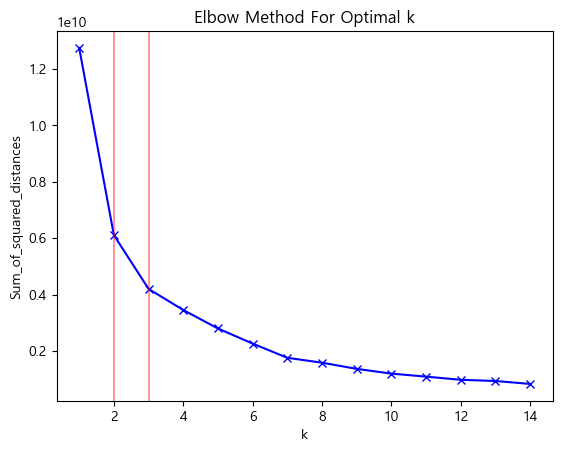

In [163]:
from sklearn.cluster import KMeans

# # 군집분석에 사용할 피처 선택
# features = grouped.drop(columns=['대여대여소ID'])

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(features)
    sum_of_squared_distances.append(km.inertia_)
    
# 시각화

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.axvline(2,c= 'r',alpha =0.4)
plt.axvline(3,c= 'r',alpha =0.4)
plt.show()

In [164]:
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(features)
  clusters = kmeans.predict(features)

  score = silhouette_score(features, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.5859813635394627
k : 3 score : 0.46252571202880305
k : 4 score : 0.4262747653528918
k : 5 score : 0.4396391089804624
k : 6 score : 0.42642630167356094
k : 7 score : 0.3886247007710414
k : 8 score : 0.37863545604351945
k : 9 score : 0.36149340589077517
k : 10 score : 0.3625252556573451
k : 11 score : 0.3732543464652768
k : 12 score : 0.3613642817997847
k : 13 score : 0.36172057289848064
best n : 2 best score : 0.5859813635394627


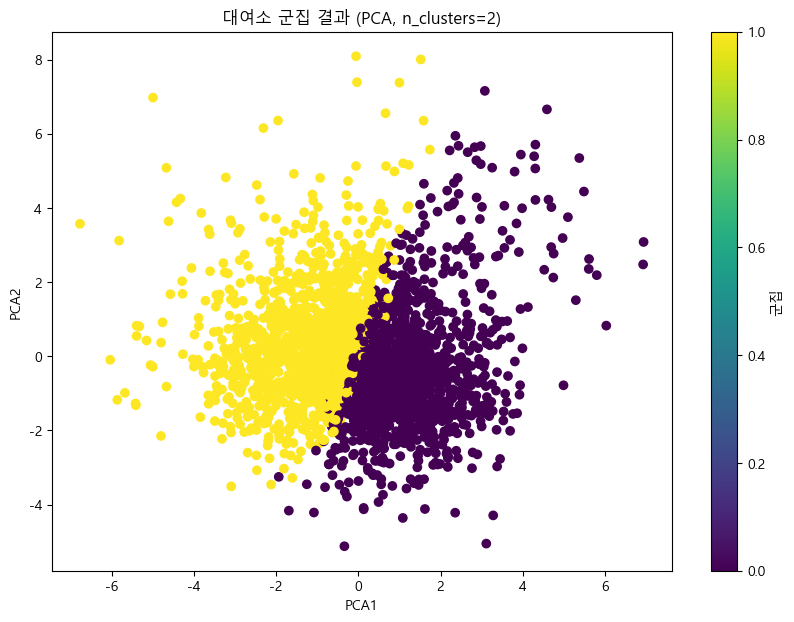

n_clusters = 2일 때 각 군집의 평균 값:


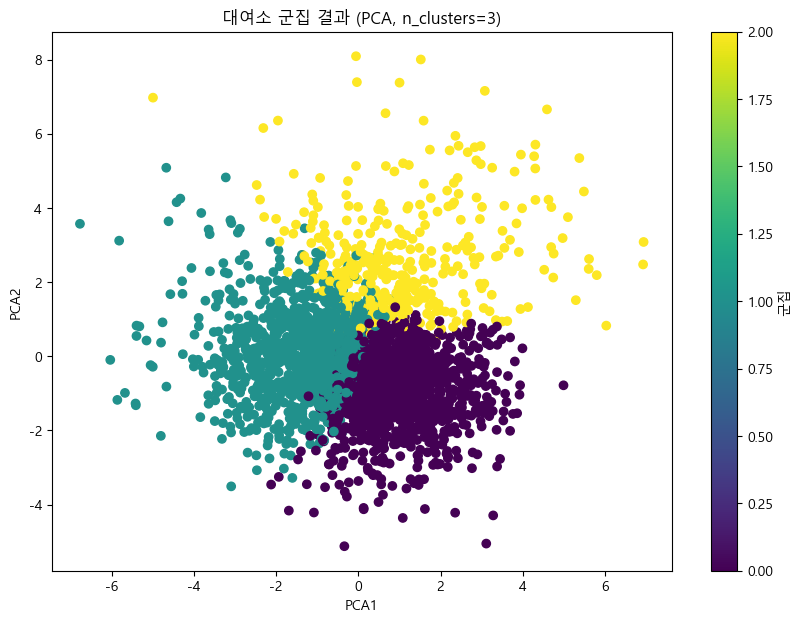

n_clusters = 3일 때 각 군집의 평균 값:


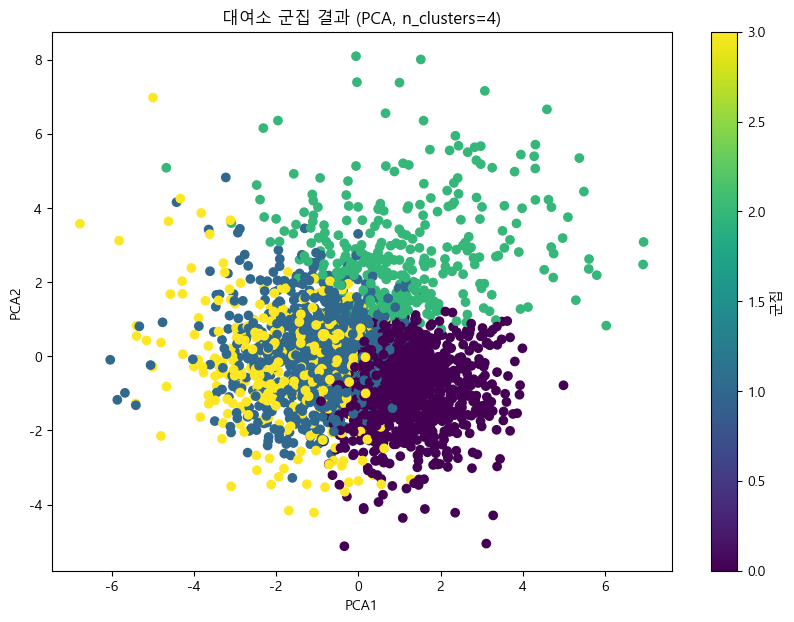

n_clusters = 4일 때 각 군집의 평균 값:


n_clusters = 2일 때 각 대여소가 속한 군집:
      대여대여소ID  군집
0       ST-10   0
1     ST-1000   1
2     ST-1002   0
3     ST-1003   0
4     ST-1004   1
5     ST-1005   1
6     ST-1006   1
7     ST-1007   1
8     ST-1008   1
9     ST-1010   1
10    ST-1011   1
11    ST-1012   1
12    ST-1013   0
13    ST-1014   1
14    ST-1015   1
15    ST-1016   1
16    ST-1017   0
17    ST-1018   1
18    ST-1019   0
19     ST-102   0
20    ST-1020   0
21    ST-1023   1
22    ST-1024   1
23    ST-1025   0
24    ST-1027   1
25    ST-1028   1
26    ST-1029   1
27     ST-103   0
28    ST-1031   1
29    ST-1032   1
30    ST-1033   0
31    ST-1034   0
32    ST-1035   0
33    ST-1036   0
34    ST-1038   0
35    ST-1039   0
36    ST-1040   1
37    ST-1041   0
38    ST-1042   1
39    ST-1044   1
40    ST-1045   0
41    ST-1046   0
42    ST-1047   0
43    ST-1048   1
44    ST-1049   1
45     ST-105   0
46    ST-1050   1
47    ST-1051   1
48    ST-1053   0
49    ST-1054   1
50    ST-1055   1
51    ST-1056   1
52    ST-1058 

In [165]:
# 변수 초기화
cluster_results = {}

# n_clusters 값을 2, 3, 4로 설정하여 K-means 군집분석 및 시각화
for n_clusters in [2, 3, 4]:
    # K-means 군집분석
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    grouped['군집'] = kmeans.fit_predict(scaled_features)

    # PCA 적용
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(scaled_features)

    # PCA 결과를 데이터프레임에 추가
    grouped['PCA1'] = pca_features[:, 0]
    grouped['PCA2'] = pca_features[:, 1]

    # 군집 시각화
    plt.figure(figsize=(10, 7))
    plt.scatter(grouped['PCA1'], grouped['PCA2'], c=grouped['군집'], cmap='viridis')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.title(f'대여소 군집 결과 (PCA, n_clusters={n_clusters})')
    plt.colorbar(label='군집')
    plt.show()
    
    # 각 군집의 평균 값 계산 (대여대여소ID 제외)
    grouped_means = grouped.drop(columns=['대여대여소ID', 'PCA1', 'PCA2']).groupby('군집').mean()

    # # 컬럼 별로 가장 높은 값을 가진 군집의 셀에 파란색 배경 추가
    # def highlight_max(s):
    #     is_max = s == s.max()
    #     return ['background-color: #ccffcc' if v else '' for v in is_max]

    # styled_means = grouped_means.style.apply(highlight_max)
    
    # 컬럼 별로 가장 높은 값을 가진 군집의 셀에 연한 초록색 배경 추가
    def highlight_max(s):
        is_max = s == s.max()
        return ['background-color: #ccffcc' if v else '' for v in is_max]

    # 컬럼 별로 가장 낮은 값을 가진 군집의 셀에 연한 노랑색 배경 추가
    def highlight_min(s):
        is_min = s == s.min()
        return ['background-color: #fffff0' if v else '' for v in is_min]

    styled_means = grouped_means.style.apply(highlight_max).apply(highlight_min)

    
    # 결과 출력
    print(f"n_clusters = {n_clusters}일 때 각 군집의 평균 값:")
    display(styled_means)
    
    # 각 대여소가 속한 군집 저장
    cluster_results[f'cluster_{n_clusters}'] = grouped[['대여대여소ID', '군집']].copy()

# 결과 데이터프레임 확인
df_ins_2 = cluster_results['cluster_2']
df_ins_3 = cluster_results['cluster_3']
df_ins_4 = cluster_results['cluster_4']

print("n_clusters = 2일 때 각 대여소가 속한 군집:")
print(df_ins_2)

print("n_clusters = 3일 때 각 대여소가 속한 군집:")
print(df_ins_3)

print("n_clusters = 4일 때 각 대여소가 속한 군집:")
print(df_ins_4)

In [171]:
in_k_2 = pd.merge(df_ins_2, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')
in_k_2 = in_k_2.drop(columns=['대여소_ID'])
in_k_2.columns = ['대여소ID', '군집', '위도', '경도', '구']
in_k_2.head()

대여소ID  군집        위도         경도    구
0    ST-10   0  37.55275  126.91862  마포구
1  ST-1000   1  37.51038  126.86680  양천구
2  ST-1002   0  37.52990  126.87654  양천구
3  ST-1003   0  37.53955  126.82830  양천구
4  ST-1004   1  37.51410  126.83100  양천구

In [172]:
in_k_2.to_csv('./(군집_내국인_k=2_청12간) 서울시 따릉이 대여소 별 군집결과_마스터 조인.csv', index=False)

In [173]:
in_k_3_ = pd.merge(df_ins_3, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')
in_k_3_ = in_k_3_.drop(columns=['대여소_ID'])
in_k_3_.columns = ['대여소ID', '군집', '위도', '경도', '구']
in_k_3_.head()

대여소ID  군집        위도         경도    구
0    ST-10   0  37.55275  126.91862  마포구
1  ST-1000   1  37.51038  126.86680  양천구
2  ST-1002   0  37.52990  126.87654  양천구
3  ST-1003   0  37.53955  126.82830  양천구
4  ST-1004   1  37.51410  126.83100  양천구

In [174]:
in_k_3_.to_csv('./(군집_내국인_k=3_청12간) 서울시 따릉이 대여소 별 군집결과_마스터 조인.csv', index=False)

In [175]:
in_k_4_ = pd.merge(df_ins_4, ll_join, how='left', left_on='대여대여소ID', right_on='대여소_ID')
in_k_4_ = in_k_4_.drop(columns=['대여소_ID'])
in_k_4_.columns = ['대여소ID', '군집', '위도', '경도', '구']
in_k_4_.head()

대여소ID  군집        위도         경도    구
0    ST-10   0  37.55275  126.91862  마포구
1  ST-1000   1  37.51038  126.86680  양천구
2  ST-1002   0  37.52990  126.87654  양천구
3  ST-1003   0  37.53955  126.82830  양천구
4  ST-1004   1  37.51410  126.83100  양천구

In [176]:
in_k_4_.to_csv('./(군집_내국인_k=4_청12간) 서울시 따릉이 대여소 별 군집결과_마스터 조인.csv', index=False)